In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
import time
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps where neccessary
H_to_K = 1/0.000003166808534191 # conversion of Hartrees to Kelvin
H_to_GHz = 6579689.74479021 # conversion of Hartrees to GigaHertz

tol = 1e-15 # tolerance where neccessary

In [2]:
def Numerov(Energy, Num, V_r, dr, grid): # function to find psi(r) continuum state (E>0)
    global psi
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - V_r) # wave number squared for the energy
    ksq_p = 2*mu*Energy
    #print(max(ksq))

    for i in range(2,Num):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
       #     print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
        #    print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
        psi = psi/max(psi)
        if i == int(0.5*Num):
            print('halfway there')
        if i == int(0.9*Num):
            print('almost there')
    
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, grid) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    #print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

# Ground State --- Lennard-Jones
## $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}^{12}$, $C_{6} =  2\times10^{5}E_{h}a_{0}^6$

42933
 min of VLJ = -0.0033332717829690412 Eh
 smallest deBroglie wavelength = 0.32348957357594116 ao
halfway there
almost there
Took 88.149 seconds


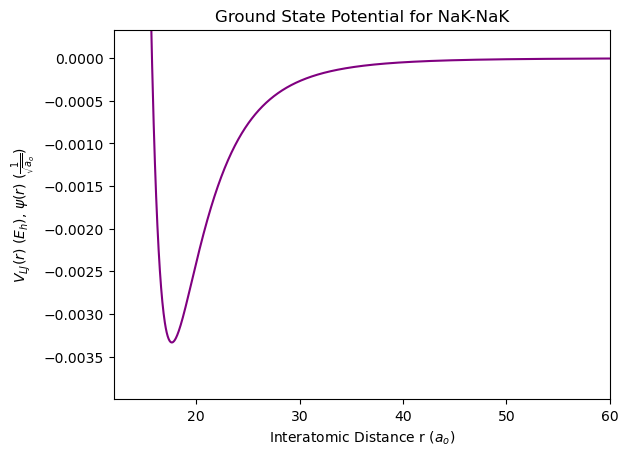

In [4]:
time_start = time.time()

R1 = 12 # starting posistion r1 in ao
R2 = 1300 # ending posistion r2 in ao
dr1 = 0.03 # step spacing in ao

scattering_lengths = [23.118272010998865, 23.294772927224223, 23.47102188863188, 23.647187978773193, 23.823426831925502, 23.999405940636574, 24.17522106780508, 24.35119330384819, 24.52683040828181, 24.7025339096497, 24.87794230404325, 25.05351626848902, 25.22866799412433, 25.403976102477202, 25.57906016985038, 25.75399709786118, 25.929167925228914, 26.103819650298952, 26.278536474522717, 26.45327416041281, 26.627741622053176, 26.80232713591603, 26.97670560569878, 27.150975587506338, 27.32525972628038, 27.499381777965485, 27.673407128668362, 27.8474624862435, 28.02125296431039, 28.195077301795596, 28.369020984121608, 28.542667703266964, 28.71626195545282, 28.889754036799854, 29.063166197506348, 29.23663270593716, 29.409967512225727, 29.58322412500383, 29.75640860290315, 29.92941160637291, 30.10255113717957, 30.27549038983977, 30.44842566036709, 30.621256088261728, 30.79404420921181, 30.966989091694167, 31.1396226921441, 31.312066910925818, 31.484642482774664, 31.657168637453758, 31.829651905110833, 32.002217936282825, 32.17444364199891, 32.34683304219149, 32.51915756915785, 32.69132434952043, 32.86349293064404, 33.03555535718583, 33.2076821838651, 33.37981994201011, 33.55178498115053, 33.72364702121798, 33.89558794615671, 34.06747038457139, 34.23934762347775, 34.411242159474796, 34.58286525924613, 34.75476597250081, 34.92633791407633, 35.097919488316066, 35.26971941788882, 35.441306012427425, 35.61279034934069, 35.78446559446213, 35.95593859217163, 36.12741394499274, 36.298893073243335, 36.47027625973313, 36.64178563524377, 36.81327460029353, 36.984592972221705, 37.15597820251114, 37.327432357469185, 37.49869894828373, 37.67017406870815, 37.84135303385856, 38.01267920872173, 38.18383532720373, 38.35513066430979, 38.52646312079771, 38.69769165337334, 38.86900319497565, 39.04019596368168, 39.21140638224471, 39.38264848829809, 39.553947811461974, 39.72514058158485, 39.896381690168454, 40.06766353900581, 40.2387449989234, 40.41013760710065, 40.581430408594464, 40.75260375087729, 40.92387031175787, 41.09503991429578, 41.26638722669598, 41.437743742678315, 41.60900608802441, 41.78011456698394, 41.95154298408575, 42.12278994292378, 42.294186207944264, 42.46551337992609, 42.636771444429314, 42.80828780083513, 42.97964152500535, 43.15107859025443, 43.32256325643795, 43.49407269700353, 43.665562352584644, 43.83710418513231, 44.00859104756528, 44.18019295750647, 44.35168758463926, 44.52349421527677, 44.69505978709487, 44.866665289035, 45.038462305354386, 45.210245905575874, 45.38193388380732, 45.55385219835375, 45.725707973300125, 45.897579954724314, 46.06954589471267, 46.24136466558431, 46.413495368318785, 46.585684298748504, 46.75771701107093, 46.929879207625035, 47.10205413312046, 47.27429362298639, 47.44661030869783, 47.6190577459816, 47.791436226211154, 47.9638141158306, 48.136273535677375, 48.308898004865185, 48.481528333576904, 48.654172680446585, 48.82681828281923, 48.99970326818758, 49.17234711541183, 49.34531654893292, 49.518282973273315, 49.69133604312737, 49.86444401929589, 50.03758544601891, 50.21079925542494, 50.384125120181245, 50.55746404066555, 50.730873179721485, 50.90442623076172, 51.07789548297257, 51.25146611582972, 51.42533340610605, 51.59909512141471, 51.77298386885807, 51.94697594737338, 52.121015532889466, 52.295133341549416, 52.46933995274364, 52.64355778351915, 52.8178779639753, 52.99233187837786, 53.16688432660543, 53.341461397909434, 53.516256784650636, 53.69097897789195, 53.865891866767484, 54.040771622076285, 54.215898079882486, 54.39120003515682, 54.566355560053296, 54.74169634880903, 54.91712689144703, 55.09271839801969, 55.26849972158205, 55.44421536477019, 55.62007345970823, 55.79596978515556, 55.971992389262, 56.14829753950286, 56.32457541751693, 56.500934129335015, 56.67745881586173, 56.8540064623882, 57.03077847978694, 57.207594573966894, 57.384553650356494, 57.56164319104755, 57.73882889498723, 57.91620096694365, 58.09363329231044, 58.27128620731086, 58.44885407768607, 58.62672866319602, 58.80455030770615, 58.98280067160782, 59.160861769206285, 59.3391732922414, 59.517552107388966, 59.69616887145585, 59.87489661080523, 60.053810251430825, 60.23273123834682, 60.41188041795604, 60.59111734211227, 60.77052522465539, 60.950011226682875, 61.12972289469967, 61.30964811241649, 61.489569656951076, 61.66972039836081, 61.849905847660615, 62.03028227054083, 62.210970038947934, 62.39172491798609, 62.572472474162524, 62.753547284342844, 62.93483718263248, 63.11605097126742, 63.29748646974467, 63.47924446759859, 63.66107805080651, 63.84297484663864, 64.02527229335278, 64.20742225000143, 64.39000407725736, 64.57258765490691, 64.7554159941386, 64.93836923601212, 65.12157930190341, 65.30496191598527, 65.48840264026727, 65.67207623440962, 65.85592451406795, 66.04000728768663, 66.22419354984343, 66.40870124586922, 66.5932263403548, 66.77800899461002, 66.96307243052092, 67.1481987903036, 67.3334525705659, 67.51904644890355, 67.70469200568667, 67.8906841298208, 68.0767439436979, 68.26311869438214, 68.4496781800363, 68.63637801428723, 68.82318971906008, 69.0104756303178, 69.19771041884007, 69.38528186019269, 69.57300490850893, 69.76093081074649, 69.94914125232991, 70.13754727444304, 70.32607389072827, 70.51490675160032, 70.70384519818056, 70.89316117678761, 71.0825348091728, 71.2723299217323, 71.46224020094407, 71.65233272234534, 71.84276090138711, 72.03333268976742, 72.2241084105613, 72.41509002659225, 72.6065425516525, 72.79803341002916, 72.98965183534031, 73.18171671595832, 73.37398120443287, 73.56644018780068, 73.75918250869071, 73.95216055812233, 74.14532550325508, 74.33880420392344, 74.53261035966176, 74.72650524402944, 74.92068990242596, 75.11520399770173, 75.30997577183402, 75.50486890029387, 75.70007089792391, 75.89573731788849, 76.09141019545909, 76.28749382502289, 76.48381063254715, 76.6803633451538, 76.87724800614954, 77.07445017930279, 77.27180026926779, 77.46943518848005, 77.66742852090927, 77.86572104105558, 78.06420429702162, 78.26305869613019, 78.46214001883551, 78.66161925673607, 78.86116384712739, 79.06113799145052, 79.26140821043681, 79.46192509549937, 79.66290023413917, 79.86402169340887, 80.06547397066879, 80.26722683559419, 80.46928664908184, 80.6717397725811, 80.87432934994486, 81.07740064714498, 81.28075503192909, 81.48431393282713, 81.68830905734521, 81.89263346233895, 82.0971148202143, 82.30206717920099, 82.50726084405599, 82.7128894813491, 82.91875411354194, 83.12507822143947, 83.33154143151143, 83.5384902558376, 83.74573751917066, 83.9533214816129, 84.16122568824706, 84.36946330142001, 84.57810726069792, 84.78713434379239, 84.9963383941621, 85.20612953863252, 85.41606533631965, 85.6266469475012, 85.83726823384346, 86.04840912570482, 86.25988032579866, 86.4717905540894, 86.68392497341317, 86.89661165585967, 87.10954859696952, 87.32289389173012, 87.53662738753466, 87.75078890045509, 87.96524089024582, 88.18007063117892, 88.39550137261027, 88.61110139395797, 88.82714108499802, 89.04357797026064, 89.260435316974, 89.47762055568494, 89.69540096160773, 89.91339159622703, 90.13192145704305, 90.3507968375466, 90.57004843408711, 90.7897883312792, 91.00993915872351, 91.23041587122522, 91.45144355225322, 91.67293950305299, 91.89471914432046, 92.1170557543436, 92.33972894980464, 92.56287685308988, 92.78645528985587, 93.01048957833027, 93.23500718122291, 93.45989034061789, 93.68536208128683, 93.91106522003116, 94.13744386190392, 94.36412718360208, 94.5913875158466, 94.81912116710033, 95.04718984007587, 95.27584573758193, 95.50495585457213, 95.73451452894365, 95.96456857398636, 96.19514903415367, 96.42616234290506, 96.65764762916454, 96.88963404970397, 97.12217558703003, 97.35521332915766, 97.5886517388549, 97.82270908127227, 98.05722095831402, 98.29228077210274, 98.5278830998122, 98.7639493459056, 99.00049746081558, 99.23752021437696, 99.47521339953954, 99.71328989994439, 99.95208422470142, 100.19134592916548, 100.43104531664787, 100.67144130309964, 100.91230622506303, 101.15371362542943, 101.39561378627815, 101.63822176982659, 101.88119308300816, 102.12487700564296, 102.36918290068789, 102.61397267955284, 102.85939829896374, 103.10524724921449, 103.35181761386981, 103.59897970980644, 103.84670058926837, 104.09493871544429, 104.34384963903183, 104.59341541890677, 104.8434283429498, 105.09415511474675, 105.34547932894975, 105.59746740026398, 105.85000715155684, 106.10315145212341, 106.3570002951303, 106.61143322629988, 106.86654289703117, 107.12229077321811, 107.3786649488414, 107.63563245289716, 107.89332869144755, 108.15162294875095, 108.41057548177149, 108.67025452148368, 108.93063003426207, 109.19155917674071, 109.45323610003034, 109.71559945472953, 109.9786187733818, 110.24235946433897, 110.50676593544296, 110.77182788602627, 111.03780732277937, 111.30420029093358, 111.57145587581938, 111.83946992022017, 112.1080471480115, 112.37753187911058, 112.64762214211821, 112.91852290231864, 113.19015484290397, 113.46245886935077, 113.73561109006476, 114.00956085687928, 114.28408460498291, 114.55947036046423, 114.83566969554754, 115.1125995477344, 115.39031599561852, 115.66879532191645, 115.94809104123968, 116.22816996933143, 116.50907951790127, 116.79074716884759, 117.0732375382828, 117.35650914483756, 117.64062083001913, 117.92568482741157, 118.21133154165472, 118.49811142077365, 118.78549016264859, 119.07390358541738, 119.36304160453051, 119.65306819077921, 119.94401926719185, 120.23567792362455, 120.52844874463193, 120.82187972668744, 121.11638065888533, 121.41169205574249, 121.70783787502012, 122.00502953943501, 122.30304390715385, 122.6019516956358, 122.9018553730877, 123.20271935850627, 123.50438817612377, 123.80717348019044, 124.11075471193642, 124.4154009182975, 124.72093996865134, 125.02741241379562, 125.33498696610036, 125.64340119311066, 125.9529168109277, 126.26343848697906, 126.57486225347729, 126.88734452410905, 127.20085098784168, 127.51538334331484, 127.83098545734667, 128.14753025790756, 128.46516949275986, 128.78391750470107, 129.10359701768232, 129.42444666441477, 129.74638296105894, 130.0693219049789, 130.39334227791363, 130.718564566792, 131.04475070529014, 131.37213715013593, 131.70060055974682, 132.0302587467502, 132.3610140085759, 132.69292500559325, 133.02594250648332, 133.36017090304904, 133.6955380304609, 134.03213555152777, 134.36983885380846, 134.70878880965756, 135.04883543953753, 135.3902402607889, 135.73280308899064, 136.07652979456196, 136.4215457303676, 136.7678244807327, 137.11537036081722, 137.46416642022916, 137.81418042371286, 138.16552711695033, 138.51813083825283, 138.87206369113147, 139.22730031271732, 139.58384563928755, 139.94177429533173, 140.30096736703638, 140.6615206546726, 141.0233791515743, 141.38671251993597, 141.751396178956, 142.11741744497553, 142.4849060515085, 142.8537543771084, 143.22401161410693, 143.59573503598241, 143.968939690748, 144.3435074236211, 144.71953995493834, 145.09704112429864, 145.47605621594758, 145.85658652936021, 146.23859189686792, 146.62213205322612, 147.00721992871584, 147.39374852215533, 147.78193777227796, 148.17164902490376, 148.5629433825438, 148.95583140138308, 149.35030598297033, 149.74639283778785, 150.144095431761, 150.5434830712723, 150.94444776352142, 151.34715855447655, 151.75146781554002, 152.15751877517548, 152.56529419897262, 152.9747421579455, 153.38595864023802, 153.7989029111037, 154.21354248182476, 154.6299808514519, 155.04819761510726, 155.46816829292473, 155.89005340820168, 156.31373852501326, 156.73924004074738, 157.16659963988616, 157.5958315613863, 158.02695688265717, 158.4599549078125, 158.89493639945547, 159.33179503980915, 159.77059422155003, 160.21145127210582, 160.6541391726049, 161.09888779396093, 161.54568067946954, 161.99445963235704, 162.44534093578517, 162.89826727504771, 163.3533015466953, 163.81032859530677, 164.26951485686004, 164.73084861184418, 165.19430668774962, 165.65990983131434, 166.12778005570698, 166.59785392965782, 167.0700746200921, 167.54455976234155, 168.02133806539516, 168.50037275514953, 168.98167634366882, 169.46531831642508, 169.95130323725002, 170.43966500373716, 170.93038768136898, 171.4234972610499, 171.91907872831985, 172.41704005430307, 172.91751418915462, 173.42044189087588, 173.92589979773496, 174.43383132095315, 174.94438324484221, 175.45743212897014, 175.97309906558914, 176.49140272107118, 177.01237284253872, 177.53596729262142, 178.06223194258314, 178.59123567574903, 179.12293922524933, 179.65748075083812, 180.19479085999444, 180.73484518800595, 181.27779362065007, 181.82359191698427, 182.37227349891992, 182.92389654065673, 183.47845634852214, 184.03597215396198, 184.59650086789702, 185.16001331516057, 185.7266139930158, 186.29624623122567, 186.86902987458268, 187.44497338229763, 188.02408456824497, 188.6063671037772, 189.19189096788878, 189.78065434197788, 190.3727312931984, 190.96811299955328, 191.56689859570366, 192.16900328467227, 192.77453269960324, 193.38353896652146, 193.99604551998456, 194.61199272112398, 195.23156402452628, 195.85474495943922, 196.4814983680423, 197.11191269551293, 197.74601039192135, 198.3838803855273, 199.02548982428817, 199.6709293649298, 200.3202104759662, 200.97335929578335, 201.63045557733471, 202.29150621630168, 202.95652647041868, 203.6256200360643, 204.2987900559871, 204.97606445369792, 205.65752221476214, 206.34318587189583, 207.03309499530937, 207.72733178122164, 208.42592965010363, 209.12883086137856, 209.83622926524214, 210.54809625506937, 211.2644985101675, 211.9854538600453, 212.71108456742434, 213.44129238188287, 214.17633705724464, 214.91606088580698, 215.66066565827654, 216.41012321807173, 217.16451760134578, 217.92389214334602, 218.68834450123347, 219.45780090030235, 220.2324884899448, 221.01234046171055, 221.7974745247777, 222.5879227784538, 223.383748838313, 224.18501409889672, 224.9917785234283, 225.80411783993637, 226.62209882228146, 227.4457469410248, 228.27512471102486, 229.11040957037906, 229.95150699536197, 230.79861116465756, 231.65165878351775, 232.51089994809035, 233.37625354106018, 234.24785073433762, 235.12577480558434, 236.01007102508476, 236.90082731920378, 237.79813413889616, 238.7020178808438, 239.61262536744965, 240.53003551142518, 241.45423623170484, 242.38542249944152, 243.3236481183189, 244.2689658414395, 245.22145835949183, 246.18125540138075, 247.148442083059, 248.12306292777384, 249.10524796017222, 250.09511674116058, 251.0927139122345, 252.0981619382635, 253.1115545977546, 254.1329966692117, 255.16260158650948, 256.2004681741267, 257.24668950260747, 258.3013656912495, 259.364628209206, 260.43659968882326, 261.5173521258456, 262.6070630940786, 263.70580626822783, 264.8136551586426, 265.9308386490494, 267.05739257064386, 268.19349934388634, 269.33927288820536, 270.49480614656574, 271.6602937289903, 272.83585792670533, 274.0215954334499, 275.2176578305826, 276.4242331940389, 277.64142965752916, 278.8693834666248, 280.1082964275934, 281.35828651432837, 282.61950000452697, 283.89211932319233, 285.1763273691477, 286.47222778454676, 287.78007271928504, 289.0999741385099, 290.43211569889286, 291.77670875119344, 293.1339053631286, 294.50388419484966, 295.8868636885036, 297.28304027744343, 298.69260419682115, 300.11574314178665, 301.55266650655904, 303.0036039780829, 304.4687594432814, 305.9483566705865, 307.4425997617436, 308.9517553578037, 310.47602799217464, 312.01563048080806, 313.5708649184339, 315.14194727254255, 316.729118893976, 318.33269122167496, 319.95285718822515, 321.58995044223445, 323.24420750694463, 324.91592185364846, 326.6053716008108, 328.31287064562576, 330.03872145401374, 331.78322158245004, 333.5466685209112, 335.3294150056412, 337.1317865004599, 338.9541045527723, 340.79670868224576, 342.65998449828413, 344.5442639009616, 346.449925834164, 348.3773526921678, 350.3269203657878, 352.29902283242967, 354.29410094449776, 356.31252250654154, 358.3547436030398, 360.42119272526844, 362.5123058783751, 364.62854808325574, 366.7703963459286, 368.93832645093676, 371.1328335633886, 373.35442128713595, 375.6035934884792, 377.88089430501776, 380.1868827251846, 382.5221121930702, 384.88713529655894, 387.28256876359586, 389.70899959737164, 392.16706092071075, 394.6573773180564, 397.1806076238643, 399.73744812392505, 402.32855510436355, 404.9546629207514, 407.6164899138372, 410.3147993770568, 413.05034644210775, 415.82393822980504, 418.63638467336705, 421.4885317178505, 424.38122970227215, 427.31538724718445, 430.2919120606366, 433.3117564324622, 436.37586881340843, 439.4852697940313, 442.6409851302623, 445.84407253289777, 449.0956391371742, 452.3968057345465, 455.7487312688604, 459.15263128663867, 462.60973406992605, 466.1213328288401, 469.68872373278265, 473.3132954014205, 476.9964464824424, 480.73962872497964, 484.5443471155154, 488.4121534234504, 492.3446729254882, 496.3435423474856, 500.4105000026625, 504.54731793428437, 508.75583013484794, 513.0379579304761, 517.3956742471688, 521.831028545496, 526.3460963387478, 530.9431689270751, 535.6244552565917, 540.3923535960797, 545.2492630292004, 550.1978447182789, 555.2406405714753, 560.3804608209905, 565.6201193922406, 570.9626188550684, 576.4110948582507, 581.9686493209208, 587.6387178001116, 593.424855648743, 599.3304958098528, 605.3595353643889, 611.5159720060817, 617.8038377881661, 624.2274728167076, 630.7913633124151, 637.5001871755959, 644.3588121049003, 651.3723999506923, 658.5462966378847, 665.8860948137894, 673.397693026593, 681.0871821637487, 688.961053440038, 697.0260908862074, 705.2893232031622, 713.7582879775642, 722.4407413087895, 731.344954318431, 740.4795195894663, 749.8537369362327, 759.4770890886831, 769.3596424297132, 779.512187351771, 789.9459170480009, 800.6728011376113, 811.7055022504195, 823.0572706808066, 834.7422021136725, 846.7753425528714, 859.1725260223501, 871.9505785794431, 885.1274511448071, 898.7223316211471, 912.7550437881632, 927.2476600599454, 942.2233376713924, 957.706073685038, 973.7229680558817, 990.3016249758011, 1007.4730169344892, 1025.2682706890932, 1043.72395143604, 1062.8754870922228, 1082.7647672040016, 1103.4350909058326, 1124.9328828794498, 1147.3102008333549, 1170.6210444477445, 1194.9267374785024, 1220.2895945466632, 1246.7833765709042, 1274.483809818323, 1303.4764744523654, 1333.8527378827032, 1365.7159253751222, 1399.1798877799195, 1434.3618975818345, 1471.406470501572, 1510.4592963631108, 1551.6863520747145, 1595.2802920501192, 1641.4605120830197, 1690.4479235792119, 1742.510648737232, 1797.9523264909199, 1857.1106333673079, 1920.3742185893047, 1988.1847754503342, 2061.0526120272407, 2139.563295209347, 2224.402313124711, 2316.3671157058475, 2416.397120959136, 2525.590370424556, 2645.282559874489, 2777.057281452176, 2922.8530876535683, 3085.040468632654, 3266.482620779692, 3470.916435125633, 3702.983187026742, 3968.6571224301915, 4275.846836950877, 4635.072275896211, 5060.881890377108, 5573.4808882408415, 6202.621760052971, 6993.107048492643, 8016.120453958647, 9391.717134045519, 11341.510363670053, 14316.242740615904, 19418.95812763317, 30187.673964690628, 67930.85046869452, -269652.6174290021, -45124.916832271294, -24603.120603474403, -16905.4596077338, -12873.305370987267, -10390.119534129384, -8708.466128171483, -7493.761850438987, -6575.169763392489, -5856.230101703819, -5278.297690674371, -4803.5608362236535, -4406.5769548575345, -4069.7471683956105, -3780.3515662799314, -3529.0222061102936, -3308.7045580244408, -3113.9921427462714, -2940.70589300862, -2785.4404783416985, -2645.529112108226, -2518.82491815703, -2403.5339020068045, -2298.161139947846, -2201.5072613256925, -2112.508664272709, -2030.3190486009535, -1954.1434143614872, -1883.3835333865368, -1817.4545377066447, -1755.8976447960151, -1698.2678562714593, -1644.2111982641727, -1593.4496861968728, -1545.6182665351694, -1500.5033840301744, -1457.8838611632568, -1417.547299723827, -1379.320169966627, -1343.0465976347807, -1308.5701044729267, -1275.7643499662956, -1244.509164044983, -1214.6960158240904, -1186.2389684075422, -1159.0319441516922, -1133.0059540199818, -1108.0751508981452, -1084.1763992476078, -1061.2474401966854, -1039.2331085938013, -1018.0714076142697, -997.7221147626933, -978.1354467033509, -959.2673607907614, -941.0825510270405, -923.5426619502565, -906.6121055497671, -890.2659457900407, -874.4657040499083, -859.1880866335484, -844.4100137851597, -830.1061462215883, -816.2532914595674, -802.8297567306535, -789.8144686295537, -777.19279175293, -764.9435174713329, -753.0514038520118, -741.5023228179949, -730.2823667996705, -719.3722416472583, -708.766923523695, -698.4466193732518, -688.4053254709263, -678.6287107811257, -669.1065665684241, -659.8304484850371, -650.7893665937958, -641.9754925656756, -633.3796878001408, -624.994402498602, -616.8124678851411, -608.8250439309627, -601.0259058220403, -593.4106464367371, -585.9685048978802, -578.6968853610825, -571.5872722414833, -564.637606433899, -557.8391554722815, -551.1897620147847, -544.6834461451848, -538.3152166561904, -532.0801726518403, -525.9766989904431, -519.997717904027, -514.1401518629976, -508.4027697750719, -502.7779281149728, -497.26564212220694, -491.8602571278768, -486.55937463556177, -481.35945372509667, -476.2583010986283, -471.2581648130979, -466.34462717606, -461.52382285615096, -456.7923653507047, -452.14445298897635, -447.5815127279801, -443.1000856456644, -438.69592476774915, -434.36866629712193, -430.1175009096542, -425.9381858967624, -421.8295035829045, -417.79088581666355, -413.81906745315587, -409.9129584360428, -406.07144064516626, -402.2918403256368, -398.5736751857007, -394.9141877744155, -391.31333962184004, -387.768611152201, -384.2800047701812, -380.84471625690446, -377.46179022948525, -374.13105760681236, -370.8505381996558, -367.61923388050235, -364.43542002040084, -361.29892135252663, -358.2078758373728, -355.16156468757373, -352.1598279177031, -349.201305753872, -346.28390094324305, -343.40904921562634, -340.5729408500822, -337.77628910063567, -335.01873070716954, -332.29860369636333, -329.61561309802954, -326.9684907499824, -324.3575999662402, -321.7798818713027, -319.2373412757432, -316.7275591929478, -314.2507833855701, -311.80604274700465, -309.3925995504078, -307.01005577247, -304.6574903557495, -302.334676195435, -300.0410973296089, -297.7753499973563, -295.5377434242621, -293.3274645580023, -291.14428758678235, -288.9873328377989, -286.8560094482357, -284.7503655406073, -282.66977733329037, -280.6139412538206, -278.5817431698471, -276.57309472954546, -274.5879482293409, -272.6251964411057, -270.6852506041117, -268.7670969267499, -266.87038640921065, -264.99520338624274, -263.14112681513126, -261.30679000935595, -259.49308382898386, -257.69960501937663, -255.92497456981008, -254.16974583195955, -252.43367535519022, -250.71477970225382, -249.01582358176572, -247.33347157610373, -245.6699768111915, -244.02237886471096, -242.39363585726036, -240.78039617507224, -239.18382334338415, -237.60379741892288, -236.03953452988597, -234.49141490256338, -232.95811089032972, -231.44109406801584, -229.93883966377058, -228.45048620301313, -226.97764145229272, -225.5184811205125, -224.07379002409996, -222.64332864953286, -221.22587125131247, -219.82226426104128, -218.43219804303473, -217.05503045701005, -215.69075696691056, -214.3395385913439, -213.00044250999144, -211.67410657763128, -210.35938299008308, -209.0575623521798, -207.76670214895623, -206.48789754466662, -205.22030718865616, -203.96440008117503, -202.71960034490982, -201.48563288464067, -200.2625757597327, -199.05031796663732, -197.8486712205892, -196.65765666532445, -195.47616100160957, -194.30538064023713, -193.1451668973117, -191.9941990689904, -190.85268525520513, -189.72102692143926, -188.5991327133485, -187.48627460623942, -186.38263810251885, -185.28827928248816, -184.20314431635057, -183.12666548426455, -182.05878237027108, -180.99972277120239, -179.94918138213046, -178.90702094200807, -177.87308212049538, -176.84756280445706, -175.83021924171325, -174.8205607629576, -173.81915509460688, -172.8253411174882, -171.83913625055501, -170.86067576903346, -169.89005130419017, -168.9266395232927, -167.97002187090163, -167.02156491637876, -166.08002401913555, -165.14502293138122, -164.21746479016642, -163.29677457135682, -162.38279845870005, -161.47567327402112, -160.57538022809933, -159.68150167794326, -158.7942224327941, -157.91315162156852, -157.03857006537106, -156.17058119259718, -155.30796195757537, -154.4526389153739, -153.60244992902412, -152.75867878898276, -151.9208607195155, -151.0888134303282, -150.26227268536053, -149.44167041683224, -148.62675317489092, -147.81789993917147, -147.01385878051119, -146.21593983813716, -145.42288815057796, -144.63541224158237, -143.8532521894706, -143.07635234533592, -142.30442463668933, -141.5381539967825, -140.77651662784274, -140.02008014661575, -139.26820733516817, -138.52183136726632, -137.78010120431156, -137.04329418510608, -136.3107844866878, -135.58371476389058, -134.860343468367, -134.1425096442706, -133.4287465965044, -132.71962062477616, -132.01483078743811, -131.31479990032315, -130.61888868672116, -129.9271114411875, -129.239614789491, -128.556761284474, -127.87791299628323, -127.20312518803806, -126.53251452735188, -125.86609779144233, -125.20377605187454, -124.54543002217255, -123.89040897137698, -123.23990471159613, -122.5935363708704, -121.95035114444246, -121.31110462225001, -120.67591269928657, -120.04427965593662, -119.41625421405314, -118.79198954746461, -118.17115989084398, -117.55400749922802, -116.9405169789717, -116.3302665235725, -115.72375428726377, -115.12057303150961, -114.5208855086528, -113.92447412158477, -113.33144574602913, -112.74163508234803, -112.1550505824109, -111.57196866442831, -110.99198093566709, -110.41539710414995, -109.84175024299272, -109.27125011079882, -108.7039419107052, -108.13950505331961, -107.57835477490933, -107.01984949211027, -106.46449279556143, -105.91257486212027, -105.3632820274779, -104.81681025557121, -104.27334903816626, -103.73230977056927, -103.19456228424794, -102.65943615225943, -102.1272731309149, -101.59763033576071, -101.07097004379582, -100.54660521692034, -100.02551996026249, -99.50686385254902, -98.99056550426813, -98.47693937180134, -97.96611183924193, -97.45773381095839, -96.95214369411084, -96.4487515842532, -95.94822631866901, -95.44920041679393, -94.9541803698146, -94.46039248497365, -93.96930607089674, -93.48071898849507, -92.99470289230652, -92.51046056024082, -92.02938699517046, -91.54992435936168, -91.07296293812921, -90.59839895851263, -90.12618026884732, -89.65587946351964, -89.18809416478335, -88.72207319796762, -88.25883797068478, -87.79738619466043, -87.33789270461473, -86.88105234229174, -86.42607158895986, -85.97290165935513, -85.52215399491365, -85.07349235050528, -84.62669781466164, -84.18199740256026, -83.73931044788549, -83.29870884720431, -82.85996669908748, -82.42338351556688, -81.98818210522094, -81.55557024368004, -81.12464417510492, -80.69554369406447, -80.26843957199918, -79.84298760582308, -79.41945490772127, -78.99800964608528, -78.57808578021647, -78.16027874819564, -77.74394358462133, -77.32943078277816, -76.91701879869392, -76.50616044632392, -76.09703433820741, -75.68957386495141, -75.28396973990363, -74.87979700529165, -74.47773363052934, -74.07711765456615, -73.678002681973, -73.28054686513784, -72.88492643359596, -72.49098593113506, -72.09864405822562, -71.70783680566048, -71.31860597070775, -70.9308383344926, -70.54473144409121, -70.16004411038308, -69.77716105504334, -69.39567222455136, -69.01578072868266, -68.63732046428727, -68.26021537893861, -67.88468043845393, -67.51094307547336, -67.13832732488332, -66.76707240008761, -66.39751074336397, -66.02932225669535, -65.66253170019398, -65.29702347577125, -64.93316198392455, -64.57044582777247, -64.20910717668997, -63.84925855861957, -63.49092491507752, -63.13373586765101, -62.77802013462969, -62.42331719999611, -62.07033891790143, -61.71838245867469, -61.367933293880704, -61.01872995377777, -60.67060995896152, -60.32376792264038, -59.978344416683726, -59.63430446938437, -59.29140144384427, -58.94949626992271, -58.60939217929087, -58.269924264783064, -57.931818534851296, -57.59503433486955, -57.25933821111221, -56.924770363257686, -56.591860535491676, -56.25969210823263, -55.928613425080535, -55.598751016901105, -55.27027606553085, -54.94275666147781, -54.61635425237604, -54.290995960313, -53.96693637247509, -53.643848160224664, -53.321971657400454, -53.000924344835035, -52.68132983728528, -52.36246588564317, -52.04496216897542, -51.728329154568186, -51.41292860941971, -51.09852987983701, -50.7850603202779, -50.47259577032995, -50.16128469790926, -49.85098012922283, -49.54153551779171, -49.233489824466666, -48.92601780783003, -48.6197595236205, -48.31431422398606, -48.00990575483973, -47.70654229460014, -47.40428288295769, -47.10263270328146, -46.80201756413045, -46.502746747577135, -46.20403885929162, -45.906390961541796, -45.60972161523295, -45.31380027781188, -45.01886088980746, -44.72499366729971, -44.431965917264414, -44.13955365821852, -43.84827036790255, -43.55785491376142, -43.268197303388554, -42.9795972901738, -42.69190260774132, -42.404988601241314, -42.11888452334638, -41.833554815044096, -41.54922307544467, -41.265489643122294, -40.98289529501837, -40.7011976629421, -40.42010233805468, -40.13974653586347, -39.86027767588943, -39.581701286910096, -39.30396836634714, -39.02712298552469, -38.75090203688776, -38.47540144416095, -38.20070813541013, -37.92698316154122, -37.6537311884181, -37.38152925181367, -37.1100563417152, -36.8392113492107, -36.569237768819384, -36.30001192900201, -36.031341906680076, -35.763487566799824, -35.49640363769836, -35.23031473538582, -34.964411602760514, -34.69976913780379, -34.435715200329504, -34.172089154689175, -33.9091867628262, -33.6474554923903, -33.38599072598403, -33.12554717126958, -32.86545739937893, -32.606398598236865, -32.347551257963964, -32.08983693465401, -31.83239349043635, -31.576007937009784, -31.319979039236234, -31.064960984681928, -30.810277058640317, -30.55660579853162, -30.303282764516943, -30.050366128156817, -29.798415127368678, -29.547124408821322, -29.2965766557788, -29.046466967383946, -28.797016603322383, -28.548088841145002, -28.29994961978896, -28.05243835642156, -27.805176239676257, -27.55895286836178, -27.313205669644653, -27.06789680394332, -26.823629997507837, -26.579496111881145, -26.33612912944091, -26.09325559590247, -25.851031622907467, -25.60931978083698, -25.3683451396468, -25.127783875949472, -24.887802544924256, -24.64846243877055, -24.409697295323003, -24.17135142737905, -23.93377090743151, -23.696423044976832, -23.45982844293824, -23.223956641894876, -22.98835742272789, -22.753293532926257, -22.51892146562343, -22.284934939976406, -22.05156155170826, -21.818611521772553, -21.586353344668698, -21.35444305568685, -21.123198801924453, -20.892434438917935, -20.662123536432752, -20.432280412820003, -20.203012875511977, -19.97411816336007, -19.745880409185098, -19.51813479904884, -19.29084491598715, -19.064147624560004, -18.8376478168402, -18.611863419867184, -18.38656053686195, -18.161720062015185, -17.937192804878617, -17.71325259012585, -17.489883288842094, -17.26687201330763, -17.04408332609949, -16.821982042630736, -16.600500836435724, -16.379333828180254, -16.15863958214059, -15.938374672291179, -15.71845116591504, -15.498869032566512, -15.280076603373685, -15.061588739030777, -14.843529226893946, -14.625889814330863, -14.40870814482681, -14.191869651693267, -13.97538939009355, -13.759369453569208, -13.543923590621697, -13.328915612456814, -13.114277169347433, -12.899800783439293, -12.68612223226887, -12.472542531279851, -12.259539615332024, -12.046897655791925, -11.834666943678476, -11.62290063073152, -11.411389609306369, -11.200267814452635, -10.989592050377592, -10.779275875220266, -10.569518192969486, -10.359827605455614, -10.150606487469593, -9.941967410595417, -9.73361618256605, -9.525620387493476, -9.317847368675688, -9.11075306632289, -8.903741380912951, -8.697333139142275, -8.490995668758814, -8.28530553159107, -8.079826419136488, -7.874717739985838, -7.670089594394501, -7.465534707249164, -7.261725265286932, -7.05788088483131, -6.854562592952889, -6.651542662127883, -6.4488362182579975, -6.246712972581531, -6.044720390922583, -5.843153297718614, -5.641738199358856, -5.440834443841115, -5.240048591592833, -5.039706295372306, -4.839922098938989, -4.640182355554233, -4.440821310782478, -4.241763729387076, -4.043123918564357, -3.8448244757515293, -3.6466254263657114, -3.4488988708605195, -3.251450861195774, -3.054410065517469, -2.8575142659838217, -2.6609390993965913, -2.4647813928558873, -2.2688951307264236, -2.073204024700976, -1.877744945266565, -1.6827911430344764, -1.4881974746109792, -1.2936554845295445, -1.0994988945999884, -0.9056132870736688, -0.7120677037043848, -0.5187183575514295, -0.32578259353631883, -0.13301944264996585, 0.05957401838649711, 0.2516785585493143, 0.4434683367640969, 0.6350473378573772, 0.8265545804384059, 1.0175354838247868, 1.2083974581380197, 1.3989309672040573, 1.5893186411429492, 1.779194610525019, 1.9690575411482412, 2.158569315073716, 2.347693429948022, 2.536791456151405, 2.725480905901154, 2.9139734193211027, 3.1021451434212066, 3.2901959695490683, 3.47788978398774, 3.6654303733762283, 3.8527100304983355, 4.039545753482576, 4.226340236781417, 4.412920485777448, 4.59912117788647, 4.785199830015801, 4.971114576970308, 5.156600822735908, 5.341858139833938, 5.527062793619635, 5.711811771488278, 5.896371957290569, 6.08072580781188, 6.264972602809001, 6.448944495354714, 6.632587360712595, 6.816209448870872, 6.999496367141688, 7.182402566959827, 7.365566706136354, 7.548110318431453, 7.730411095327079, 7.912746208367163, 8.094729943109899, 8.27648207014134, 8.45812352763352, 8.639614069350785, 8.820812899761352, 9.001647633302804, 9.182489379317614, 9.362974567445711, 9.543428852510674, 9.723520092341731, 9.903542510446462, 10.083479093852413, 10.26296300851327, 10.44239887903439, 10.621581844514305, 10.800577970059429, 10.979411609056065, 11.158229408373591, 11.336336350723613, 11.514835229752793, 11.69296514053701, 11.870840726384372, 12.04848346410144, 12.226106773467757, 12.403466145563709, 12.580628709105003, 12.75770631841531, 12.934517284797266, 13.111160937251743, 13.287757359391296, 13.464052115587045, 13.640213072868956, 13.816151394593883, 13.992081395619268, 14.167698641394836, 14.34326870048967, 14.518447369295004, 14.693763338692868, 14.868814478688877, 15.043651465739494, 15.218459871467674, 15.392912844315642, 15.567259046523036, 15.741641018593501, 15.91570149354112, 16.08958563226492, 16.263462505130974, 16.43718848847462, 16.610574468729297, 16.783924282655686, 16.95713937626448, 17.130177742585875, 17.303102072370333, 17.475956455546008, 17.648486108905086, 17.821030306191815, 17.99337634463553, 18.16558439124201, 18.337834026708336, 18.509806747228815, 18.681593085130665, 18.853263021101508, 19.02487160883594, 19.196227318899567, 19.367563059360496, 19.538738160710334, 19.709972554888427, 19.880938460190475, 20.051645471261367, 20.222315049955416, 20.39291612391829, 20.563361480487703, 20.733724339560393, 20.903875173997474, 21.074000501438626, 21.24397713961628, 21.413775127820365, 21.58351713803897, 21.75320416091549, 21.922765619138556, 22.092159666282143, 22.26160416842267, 22.430684205333485, 22.599662681646514, 22.76869533012865, 22.937724741371095, 23.106583772295274, 23.275241034338666, 23.443643248162644, 23.612142076049345, 23.780529706900676, 23.948807944484972, 24.117071890984924, 24.285002682700437, 24.453096788797854, 24.62092865701098, 24.78878002114154, 24.956541474856763, 25.124244791193263, 25.29176148787479, 25.459344158993606, 25.626547374890144]
C12_coefs = np.linspace(3.17e8, 3.28e8, 1800)

N_big = int((R2-R1)/dr1)
print(N_big)
ipap_big = np.arange(1,N_big, 1.0)
R_grid = R1 + dr1*ipap_big

C12 = 3e12 # C12 coefficient in Eh*ao
C6 = 2e5 # C6 coefficient in Eh*ao
VLJ = (C12/(R_grid**12)) - (C6/(R_grid**6)) # standard Lennard-Jones interatomic potential



Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees

me = 9.1093837e-28 # electron mass in grams
mNa_g = 3.8175458e-23 # sodium mass in grams
mK_g = 6.4924249e-23 # potassium mass in grams
mNaK_g = mNa_g + mK_g # sodium potassium mass in grams
mNak = mNaK_g/me # sodium potassium mass in au
mu = (mNak**2)/(2*mNak) # reduced mass of sodium potassium 

hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs

min_v = min(VLJ)
print(f' min of VLJ = {min_v} Eh')
K_max = np.sqrt(2*mu*(Eo - min_v))
lambda_min = (2*np.pi)/K_max
print(f' smallest deBroglie wavelength = {lambda_min} ao')




psi = np.zeros(N_big-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, N_big-1, VLJ, dr1, R_grid) # wave function Psi


#plt.hlines(0,0, R_grid[-1], color = 'black')
#psi_1prime = np.gradient(Psi_1, r) # first posistion derivate of wave function Psi
#plt.plot(R_grid, 0.0001*Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
#plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
#plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')

plt.plot(R_grid, VLJ, color = 'purple', label = 'Lennard-Jones Potential')
plt.xlim(12,60)
plt.ylim(min_v + 0.2*min_v, 0.1*abs(min_v))
#plt.ylim(-1e-12, 1e-12)
plt.ylabel('$V_{LJ}(r)$ $(E_h)$, $\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.xlabel('Interatomic Distance r $(a_o)$')
plt.title('Ground State Potential for NaK-NaK')

time_end = time.time()
time_duration = time_end - time_start
print(f'Took {time_duration:.3f} seconds')

Text(0.5, 1.0, 'Ground State Potential for NaK-NaK')

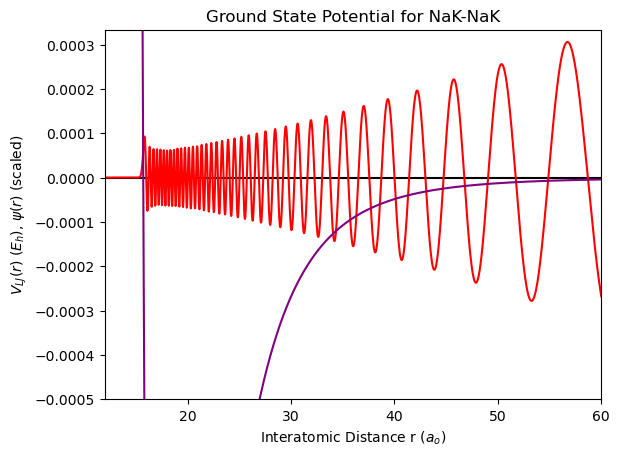

In [5]:
plt.hlines(0,0, R_grid[-1], color = 'black')
#psi_1prime = np.gradient(Psi_1, r) # first posistion derivate of wave function Psi
plt.plot(R_grid, 0.000001*Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
#plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
#plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')

plt.plot(R_grid, VLJ, color = 'purple', label = 'Lennard-Jones Potential')
plt.xlim(12,60)
#plt.ylim(min_v + 0.2*min_v, 0.1*abs(min_v))
plt.ylim(-0.0005, 0.1*abs(min_v))
#plt.ylim(-1e-12, 1e-12)
plt.ylabel('$V_{LJ}(r)$ $(E_h)$, $\\psi(r)$ (scaled)')
plt.xlabel('Interatomic Distance r $(a_o)$')
plt.title('Ground State Potential for NaK-NaK')

In [6]:
#r1_i = 1898 # index of r1 in larger grid
r1_i = 118 # index of r1 in larger grid
#r2_i = 17875 # index of r2 in larger grid
r2_i = 18375 # index of r2 in larger grid

r1 = round(R_grid[r1_i],5) # 42.5ao, smaller grid starting posistion
r2 = round(R_grid[r2_i],5) # 300ao, larger grid ending posistion
print((r1, r2))

N_small = int((r2 - r1)/dr1) # number of points in smaller grid
ipap_p = np.arange(1,N_small, 1.0) # DVR paper indexing for smaller grid
r_grid = r1 + dr1*ipap_p # sub grid to calculate DVR and FC factor on

(15.57, 563.28)


# $ V_{d_{a}d_{b}} = \frac{ \vec{d}_a \cdot \vec{d}_b - 3d_{az'}d_{bz'} }{ r^3 } $
# $= \frac{d_{a}d_{b}( \sin \theta_a \sin \theta_b \cos \varphi - 2 \cos \theta_a \cos \theta_b) }{ r^3 }$
### $= \frac{ C_3 }{ r^3 },$ $C_3(\theta_a,\theta_b, \varphi) = d_{a}d_{b}( \sin \theta_a \sin \theta_b \cos \varphi - 2 \cos \theta_a \cos \theta_b) $

# $\implies V_{E}(r) = \frac{C_6}{r^6} - V_{d_{a}d_{b}}$, $C_6$ randomly chosen, $d_{a} = d_{b} = 1.07 e a_{o}$

In [37]:
def Hamiltonian_DVR(a, b, dx, C6_coef, KE_matrix): # DVR method for finding bound states
    N = int((b-a)/dx) # Number of grid points
    ipaper = np.arange(1,N, 1.0) # indexing from the paper, given i = 1,2,...,N-1
    x = a + dx*ipaper # grid from paper
    
    for i in range(100):
        rand1 = np.random.rand()
        rand2 = np.random.rand()
        rand3 = np.random.rand()

        Theta_A = np.arccos(1 - 2*rand1)
        Theta_B = np.arccos(1 - 2*rand2)
        PHI = 2*np.pi*rand3
        C_3_coef = ((d_NaK)**2)*(np.sin(Theta_A)*np.sin(Theta_B)*np.cos(PHI) - 2*np.cos(Theta_A)*np.cos(Theta_B))
        if C_3_coef > 0:
            #print(i)
            break
    #C6_rand = np.random.randint(int(5e4), int(9.9e4))
    V_dip_dip = (C_3_coef)/(x**3)
    
    #Vx = C6_rand/(x**6) - V_dip_dip # Excited potential
    Vx = C6_coef/(x**6) - V_dip_dip # Excited potential
    #plt.plot(x, H_to_GHz*Vx)
    Vx = np.insert(Vx,0,0) # Insert a 0 at the 0th index of list to account for mismatched indexing


    #print(f' ipaper = {ipaper}')
    #print(f' x = {x}')
    #print(f' N - 1 = {N-1}')
    #print(f' len(x) = {len(x)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {x[1] - x[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))

    H_DVR = np.copy(KE_matrix) # Initialize empty Hamiltonian matrix of size N-1 x N-1
    Vmat = np.zeros((len(x) + 10, len(x) + 10))


    for i in ipaper:
        for j in ipaper:
            if int(i) == int(j): # fill in diagonal components of the Hamiltonian
                Vmat[int(i)][int(j)] = Vx[int(j)]
                
                H_DVR[int(i) - 1][int(j) - 1] += Vmat[int(i)][int(j)]
            

                
    assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')
    return H_DVR

In [23]:
time_start = time.time()
dr_DVR = 0.4
num_of_potentials = 20

#H = Hamiltonian_DVR(r1, r2, dr1) # Hamiltonian to construct excited potential bound states

#def T_Matrix(a, b, dx): # construct T matrix for DVR
xp_grids = []

Np = int((r2-r1)/dr_DVR) # Number of grid points
ipaperp = np.arange(1,Np, 1.0) # indexing from the paper, given i = 1,2,...,N-1
xp = r1 + dr_DVR*ipaperp # grid from paper
xp[0] = r1
xp[-1] = r2
xp_grids.append(xp)

    #print(f' ipaper = {ipaperp}')
    #print(f' xp[0] = {xp[0]}')
print(f' N - 1 = {Np-1}')
    #print(f' len(xp) = {len(xp)}')
    #print(x[-1]/(b-dx))
    #print(x[0]/(a+dx))
    #print(f' dx = {dx}')
    #print(f'dx from grid  = {xp[1] - xp[0]}')
    #print(Vx[len(Vx) - 1]/(0.5*(b - dx - d)**2))
    
Tmat = np.zeros((len(xp), len(xp))) # Initialize empty T matrix of size N-1 x N-1
KEmat = np.zeros((len(xp) + 10, len(xp) + 10))


for i in ipaperp:
    for j in ipaperp:
        if int(i) == int(j): # fill in diagonal components of the T matrix
            prefactorii = (np.pi**2)/(4*mu*(r2-r1)**2)
            bracketii = ((2*Np**2 + 1)/3) - (1/((np.sin(np.pi*(i/Np)))**2))
                
            KEmat[int(i)][int(j)] = prefactorii*bracketii
            Tmat[int(i) - 1][int(j) - 1] = KEmat[int(i)][int(j)]
            
        if i != j: # fill in off-diagonal components of the T matrix
            diff = i - j
            prefactorij = ((-1)**(diff))*(np.pi**2)/(4*mu*(r2-r1)**2)
            bracketij = (1/((np.sin(np.pi*((diff)/(2*Np))))**2)) - (1/((np.sin(np.pi*((i+j)/(2*Np))))**2))
                
            KEmat[int(i)][int(j)] = prefactorij*bracketij               
            Tmat[int(i) - 1][int(j) - 1] = KEmat[int(i)][int(j)]

    
    #assert(np.allclose(H_DVR, np.transpose(H_DVR)))
    #print(f' H = {H}')


time_end = time.time()
time_duration = time_end - time_start
print(f'Took {time_duration:.3f} seconds')

 N - 1 = 1368
Took 8.447 seconds


In [121]:
Intensity = 50 # laser intensity in W/cm^2
fo = 5.142206707e9	
c = 299792458

E_0 = np.sqrt(Intensity)*(np.sqrt((4*np.pi*1e7)/c))*(299.792458)*(1/fo)
print(E_0**2)

7.123632560978488e-14


In [145]:
def Sigma_PA_hw(omega_range, C12_coef, Bound_States, Bound_Energies, Collision_E): # calculate cross section over a range of laser frequencies
    
    VLJ_PA = (C12_coef/(R_grid**12)) - (C6/(R_grid**6))
    Psi_Scattering = Numerov(Eo, N_big - 1, VLJ_PA, dr1, R_grid)
    #plt.plot(r_grid, Psi_Scattering[r1_i + 1:r2_i - 1])
    wave_num_sq = 2*mu*Eo
    
    #Bound_Eigen_energies = Bound_Energies
    #print(Bound_Eigen_energies)
    #Bound_Eigen_vecs = [ [] for i in range(len(Hamiltonian_eigvals_eigvecs)) ]
    #print(Bound_Eigen_vecs)
    K_N = []

   # for i in range(len(Bound_States)):
   #     #print(i)
   #     for j in range(len(Bound_States[i])):
            #print(comparison_n)
   #         Bound_Eigen_energies[i].append(Hamiltonian_eigvals_eigvecs[i][0][j]) # collect all eigenvalues of the ith Hamiltonian
   #         Bound_Eigen_vecs[i].append(Hamiltonian_eigvals_eigvecs[i][1][j]) # collect all eigenvectors of the ith Hamiltonian
   # for i in range(len(Hamiltonian_eigvals_eigvecs)):
   #     for j in range(len(Bound_Eigen_energies[i])):
   #         Bound_Eigen_energies[i][j] = H_to_GHz*Bound_Eigen_energies[i][j]
    #print(Bound_Eigen_energies[0])
    #print(Bound_Eigen_energies[1])
    #num_of_states = []
    #for i in range(len(Bound_States)):
    #    num_of_states.append(len(Bound_States[i]))
    #for i in range(len(num_of_states)):
    #    if num_of_states[i] == max(num_of_states):
    #        Key_B_for_G = Bound_States[i][num_of_states[i] - 1]
    #        print(f'max bound state is from potential {i}, n = {num_of_states[i]}')
    
    #Gamma0 = 100*gamma
    #FC0 = np.abs(np.trapz(np.conjugate(Key_B_for_G)*Psi_Scattering[r1_i + 1:r2_i - 1], r_grid))**2
    
    #U_squared = Gamma0/(2*np.pi*FC0)
    #print(f'U^2 = {U_squared}')
    U_squared = E_0**2
    for i in range(len(Bound_States)):
        for j in range(len(Bound_States[i])):
           # if  j == 1 or j == 3:
            FC_n = np.abs(np.trapz(np.conjugate(Bound_States[i][j])*Psi_Scattering[r1_i + 1:r2_i - 1], r_grid))**2
            #print(FC_n)
            Gamma_n = 2*np.pi*U_squared*FC_n
            #print(round(Gamma_n,3))
            A_Gamma_Val = Gamma_n
        #plt.hlines(Gamma_n, -Gamma_n,Gamma_n, color = 'black')
        #print(f'n = {i}, Gamma/gamma = {Gamma_n/gamma}')
                    #print(f'VE{i}, n = {j}, Gamma = {Gamma_n}, Eb = {Bound_Eigen_energies[i][j]}')
            
            Kn_num = -1*(Gamma_n*0.5)
        #print(f'Kn numerator = {Kn_num}')
        #Delta = omega_range - Bound_Eigen_energies[i]
        #print(f' Delta[0] = {Delta[0]}')
            Detuning = (omega_range - H_to_GHz*Bound_Energies[i][0][j])
            Kn_den = (H_to_GHz*Collision_E - Detuning) + I*gamma*0.5
        #print(f'Kn denominator = {Kn_den}')
            Kn = np.array((Kn_num/Kn_den))
        #print(f'n= {i}, Kn = {Kn}')
            K_N.append(Kn)
    #print(f' K_N = {K_N}')

    K = sum(K_N)
    #plt.plot(omega_range,np.imag(K), color = 'purple')
    #print(f'K = Sum(K_N) = {K}')
    #print(np.real(K))
    #print(np.imag(K))
    
    S_num = 1 + I*K
    #print(f'S numerator = {S_num}')
    S_den = 1 + -1*I*K
    #print(f'S denominator = {S_den}')
    S = S_num/S_den
    #print(f'S = {S}')
    S_prob = 1 - np.absolute(S)**2
   # print(f' |S|^2 = {np.absolute(S)**2}')
   # print(f'1 - |S|^2 = {S_prob}')

    #Sigma_PA_2 = (np.pi/wave_num_sq)*(S_prob)
    Sigma_PA_frequency = (S_prob)
    
    
    return(Sigma_PA_frequency, K_N, K)

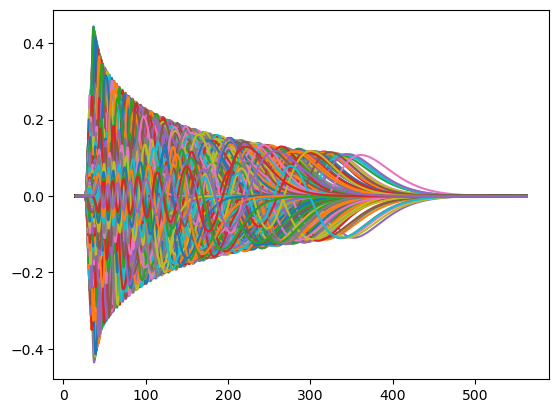

In [125]:
C6_test = 5e4
d_NaK = 1.07 # dipole moment for NaK in a.m.u.

H_vals_vecs = [ [] for i in range(num_of_potentials) ]
for i in range(num_of_potentials):  
    H_dr = Hamiltonian_DVR(r1, r2, dr_DVR, C6_test, Tmat)
    Heig = np.linalg.eigh(H_dr)[0]
    Heig = Heig[Heig<0]
    Eigvec = np.linalg.eigh(H_dr)[1]
    Hvec = []
    for j in range(len(Heig)):
        avec = Eigvec[:,j]
        Hvec.append(avec)
    for j in range(len(Hvec)):
        INT = np.trapz(np.abs(Hvec[j])**2,xp)
        A = 1/np.sqrt(INT)
        Hvec[j] = A*Hvec[j]
    H_vals_vecs[i].append([Heig,Hvec])

Phi_b = [ [] for i in range(num_of_potentials) ]
Ws = [ [] for i in range(num_of_potentials) ]

for i in range(num_of_potentials):
    w = 0
    if len(H_vals_vecs[i][0][0]) >= 10:
        while w <= int(len(H_vals_vecs[i][0][0]) - 5):
            interp_wavefct = interpolate.interp1d(xp_grids[0], H_vals_vecs[i][0][1][w])
            Phi_B_interp = interp_wavefct(r_grid)
            Phi_b[i].append(Phi_B_interp)
            w += 1
            Ws[i].append(w)

#print(Ws[2])            
    
for i in range(len(Phi_b)):
    for j in range(len(Phi_b[i])):
        plt.plot(r_grid, Phi_b[i][j])

W = []
for i in range(len(Ws)):
    if len(Ws[i]) > 10:
        W.append([Ws[i][-1] - 1,i])

W = []
for i in range(len(Ws)):
    if len(Ws[i]) > 10:
        W.append([Ws[i][-1] - 1,i])

Phi_b2 = [ [] for i in range(len(W)) ]
for i in range(len(W)):
    q = 0
    if len(H_vals_vecs[W[i][1]][0][0]) >= 10:
        while q <= int(len(H_vals_vecs[W[i][1]][0][0]) - 5):
            interp_wavefct2 = interpolate.interp1d(xp_grids[0], H_vals_vecs[W[i][1]][0][1][q])
            Phi_B_interp2 = interp_wavefct2(r_grid)
            Phi_b2[i].append(Phi_B_interp2)
            q += 1

#print(len(Phi_b))
#print(len(Phi_b2))
#print(len(W))

True_vals = [ [] for i in range(len(W)) ]
for i in range(len(W)):
    q = 0
    if len(H_vals_vecs[W[i][1]][0][0]) >= 10:
        while q <= int(len(H_vals_vecs[W[i][1]][0][0]) - 5):
            Real_eigs = H_vals_vecs[W[i][1]][0][0][0:len(H_vals_vecs[W[i][1]][0][0]) - 4]
            True_vals[i].append(Real_eigs)
            q += 1

(-10.0, -0.1)

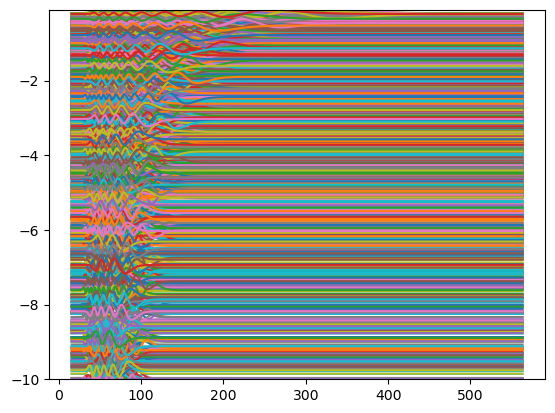

In [126]:
for i in range(len(W)):
    for j in range(len(Phi_b2[i])):
        plt.plot(r_grid, Phi_b2[i][j] + H_to_GHz*True_vals[i][0][j])
       # print(j)
plt.ylim(-10,-0.1)

halfway there
almost there
halfway there
almost there
Took 189.869 seconds


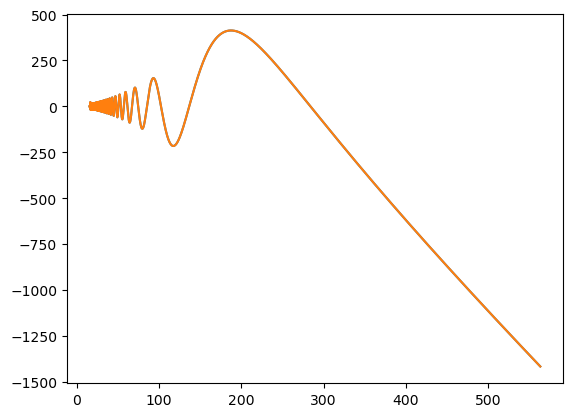

In [127]:
time_start = time.time()
psi = np.zeros(len(R_grid))
gamma = 0.1
I = cmath.sqrt(-1)
Omega_1 = np.linspace(-10, -0.1, len(r_grid))
#Omega_2 = np.linspace(-150, -10, len(r_grid))
#Omega_1 = np.linspace(-1, -0.1, len(r_grid))
#H_E1 = [[Heig1,Hvec1]]
#Bound_States = np.arange(0, comparison_n, 1.0)
#print(Heig[0])
#print(Heig[50])
#print(Bound_States)
#print(I)


Sigma_S1 = Sigma_PA_hw(Omega_1, 1.4*C12, Phi_b2, True_vals, Eo)
Sigma_S2 = Sigma_PA_hw(Omega_2, 1.4*C12, Phi_b2, True_vals, Eo)

#plt.plot(Omega_1, Sigma_S[0], color = 'firebrick', label = 'Cross section')
#print(Sigma_S)

#plt.hlines(0.5*max(Sigma_S[0]), -0.5*Sigma_S[1], 0.5*Sigma_S[1], color = 'black')

#plt.xlim(Omega_1[0], Omega_1[-1])
#plt.ylim(min(Sigma_S), max(Sigma_S))
#plt.xlabel(' hbar omega (GHz) ')
#plt.ylabel(' sigma')
#plt.legend()
#plt.title('PA cross section vs hbaromega')

time_end = time.time()
time_duration = time_end - time_start
print(f'Took {time_duration:.3f} seconds')

Text(0.5, 1.0, 'PA Cross Section vs Laser Frequency')

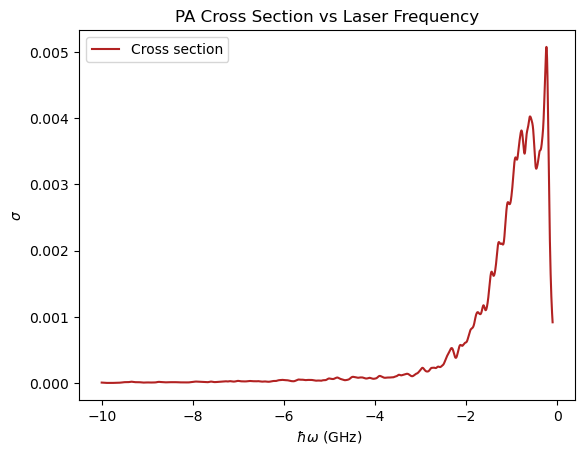

In [128]:
plt.plot(Omega_1, Sigma_S1[0], color = 'firebrick', label = 'Cross section')
#plt.plot(Omega_2, Sigma_S2[0], color = 'magenta', label = 'Cross section')
#print(Sigma_S)

#plt.hlines(0.5*max(Sigma_S[0]), -0.5*Sigma_S[1], 0.5*Sigma_S[1], color = 'black')

#plt.xlim(-20, -0.1)
#plt.ylim(min(Sigma_S1[0]), 1.5e-4)

#plt.xlim(-25, -10)
#plt.ylim(min(Sigma_S1[0]), 1.5e-4)


plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('$\\sigma$')
plt.legend()
plt.title('PA Cross Section vs Laser Frequency')

# try build happy Hamiltonians outside Sigma funct.

# Sigma vs hw, for a given scattering length

In [147]:
scattering_lengths = [0.010243933287286469, 0.4873523651021366, 0.9643725116439043, 1.441312767422435, 1.9181724451562245, 2.394953630118453, 2.8716615474108025, 3.348296313448165, 3.8248612410539, 4.301360191592009, 4.777792639029653, 5.254164555954798, 5.730474548616693, 6.206729647224365, 6.6829288493721215, 7.159075704841968, 7.635173260432172, 8.111223270257588, 8.587230361427139, 9.063191776915149, 9.539115214191163, 10.015002840214505, 10.490854287511935, 10.966673818894973, 11.442465949159418, 11.918228143869618, 12.393966209805264, 12.869684147390949, 13.34538022267255, 13.82105979938738, 14.296722807110191, 14.772377285615148, 15.24801993112512, 15.723656947411651, 16.199289095845806, 16.674915822194347, 17.15054774197515, 17.62617987661916, 18.10181599913844, 18.577463171498064, 19.053117991345182, 19.528788648186165, 20.004472094540006, 20.480173707927946, 20.95589533592249, 21.431641549724002, 21.907411806707586, 22.38320859235713, 22.859039090583074, 23.33490041419705, 23.810796682590784, 24.286731296040788, 24.762706267011453, 25.23872282556908, 25.714786190464615, 26.19089602290096, 26.66705855562812, 27.143273083314984, 27.61954244292049, 28.09586756449882, 28.572255023296893, 29.048705266476535, 29.525221788898094, 30.001805420080423, 30.47845878465603, 30.955186160482185, 31.431986785084927, 31.908866701470473, 32.38582880836695, 32.86287173301145, 33.340000383543284, 33.8172172530004, 34.29452391890193, 34.77192505501657, 35.249422841414976, 35.72701614800537, 36.204712037442896, 36.68250926520692, 37.16041219110842, 37.63842505998282, 38.11654776376449, 38.59478449034806, 39.07313557001021, 39.55160596161139, 40.03019733278185, 40.508913413721864, 40.987753639014265, 41.466723064307686, 41.94582338074626, 42.425058781824944, 42.9044284458334, 43.38393808823367, 43.86359002188373, 44.34338546267951, 44.82332667008387, 45.30341926519018, 45.78366121369357, 46.264057260140945, 46.74461196396646, 47.22532547248042, 47.706201553785846, 48.18724084171159, 48.66844880747044, 49.14982606087591, 49.63137607679283, 50.11310196680164, 50.595004369316506, 51.077087127703265, 51.5593541070769, 52.0418058329455, 52.52444695666022, 53.00727582161, 53.4903014516339, 53.97352151236108, 54.45694124953146, 54.9405620508971, 55.424388064301965, 55.90841826784163, 56.39265944309781, 56.87711252457353, 57.36178031217024, 57.84666628958561, 58.331770796390934, 58.81709868388262, 59.30265247641235, 59.78843404041795, 60.27444677908272, 60.760693982259475, 61.24717560055766, 61.73389702633933, 62.220860560630776, 62.70806799816175, 63.19552242358453, 63.68322781416185, 64.17118485389734, 64.65939768228783, 65.14786737575837, 65.63660036769662, 66.12559447749094, 66.61485663676187, 67.10438715366207, 67.59418829143821, 68.08426767265931, 68.57462236965868, 69.06525744138872, 69.55617569839083, 70.04737954232017, 70.53887195363104, 71.03065630505743, 71.52273589914996, 72.01511150806074, 72.507788055974, 73.00076708315784, 73.49405132577131, 73.98764388237757, 74.48154873412035, 74.97576695490044, 75.47030418556159, 75.96516186095123, 76.4603400911137, 76.95584455177679, 77.45167904798608, 77.94784434180939, 78.44434329915727, 78.94118194817752, 79.43835955143432, 79.93588124760818, 80.43374878353414, 80.93196581165878, 81.4305346580115, 81.92945876984288, 82.42874129487817, 82.92838609505777, 83.42839410572923, 83.92876984148428, 84.42951414678376, 84.93063337691021, 85.4321281413273, 85.93400249002526, 86.43625845245509, 86.93890146771123, 87.44193183439407, 87.94535317651142, 88.44916999404354, 88.95338453428, 89.45799923632694, 89.96301828352306, 90.46844365682327, 90.97427982468777, 91.48052727561236, 91.98719450634647, 92.49427921463946, 93.00178605862386, 93.50971967897638, 94.01808246210972, 94.52687821898968, 95.03610728733759, 95.54577669179405, 96.05588692408193, 96.56644247187432, 97.07744729452007, 97.58890354673495, 98.10081386571491, 98.61318392928719, 99.12601214133092, 99.63930718887887, 100.15306888413542, 100.66730366581939, 101.18201126477696, 101.69719762918938, 102.2128653343598, 102.72901786449268, 103.24565866812986, 103.76279016726653, 104.28041661125361, 104.79854107760842, 105.31716647589325, 105.83629754384846, 106.35593826613167, 106.87608840208595, 107.39675495479455, 107.91793978364501, 108.4396483297929, 108.96188192879382, 109.48464465570578, 110.00794036981826, 110.53177313651156, 111.05614465287499, 111.58105884861742, 112.10652187691754, 112.63253561876336, 113.15910209855177, 113.68622693251031, 114.21391340130363, 114.74216436996488, 115.27098428968658, 115.80037719613999, 116.33034526776723, 116.86089362740975, 117.39202565599301, 117.9237442244708, 118.45605375898818, 118.98895820111028, 119.52246196830599, 120.05656715384583, 120.59127746140227, 121.12659829584327, 121.66253298294014, 122.19908429865646, 122.73625802805397, 123.27405559002858, 123.81248371989635, 124.35154344737124, 124.89124062349492, 125.43157754547767, 125.97256097583531, 126.51419230707343, 127.05647566311687, 127.59941590012227, 128.1430172981426, 128.68728434591992, 129.23221808964723, 129.77782599129773, 130.32410943447033, 130.87107478080927, 131.41872370427697, 131.96706380556836, 132.51609591267132, 133.06582589190657, 133.6162587876039, 134.1673959660176, 134.71924447299568, 135.2718056788325, 135.82508525081394, 136.37908926664508, 136.93381899528322, 137.48928131422093, 138.04547926535, 138.6024162978967, 139.16009792754008, 139.71852944594596, 140.2777126881382, 140.837654977147, 141.3983580184772, 141.9598289836876, 142.52206986879912, 143.08508696998487, 143.64888448400632, 144.213464538283, 144.77883604971748, 145.34499995035821, 145.91196232310438, 146.47972745721262, 147.04830072096314, 147.6176862402907, 148.1878875127127, 148.7589104294252, 149.33076102623187, 149.90344268006345, 150.4769597898006, 151.05131790814266, 151.62652194827714, 152.20257524062055, 152.77948394698805, 153.35725246041932, 153.93588790458057, 154.51539172419217, 155.09577084574872, 155.67702947217694, 156.2591728434718, 156.8422071870045, 157.4261354930936, 158.01096478324857, 158.59669829045967, 159.18334207561333, 159.77090247588825, 160.35938286131227, 160.94879021497712, 161.53912686368562, 162.13040119376538, 162.72261628504546, 163.31577827020163, 163.90989292269097, 164.5049650953075, 165.10100126504457, 165.69800429133943, 166.29598230476788, 166.89493863737837, 167.49488134532075, 168.09581282759143, 168.69774112419114, 169.3006704387582, 169.90460831893745, 170.50955810241794, 171.11552591970377, 171.7225191220737, 172.33054115066818, 172.93959877180177, 173.54969778647475, 174.16084612981902, 174.7730452838758, 175.38630392924637, 176.00062708905486, 176.61602314730715, 177.23249318631454, 177.85004843662398, 178.46869076654016, 179.0884289194886, 179.70926898684007, 180.33121586354218, 180.95427630608873, 181.5784548496845, 182.20376113824082, 182.8301991294351, 183.45777518701286, 184.08649574088733, 184.71636778273233, 185.34739680929897, 185.97959055755214, 186.61295440309127, 187.247495410913, 187.88322087977292, 188.5201349800448, 189.1582464404965, 189.79756307705082, 190.4380871743748, 191.07982982042247, 191.7227955652753, 192.36699102115645, 193.0124246608664, 193.6591027599159, 194.3070318507054, 194.95621908637557, 195.6066708946244, 196.25839511029776, 196.9114006763734, 197.56569003636412, 198.2212735357997, 198.8781594641901, 199.53635148045157, 200.19585902202715, 200.85669111296204, 201.51885157028735, 202.18234983408834, 202.8471936160837, 203.51339008529106, 204.18094497006538, 204.84986811354597, 205.52016872376606, 206.19185135797142, 206.86492419834474, 207.53939641922602, 208.21527413737905, 208.89256635969946, 209.57128116149886, 210.25142584244418, 210.93300963815815, 211.6160379140297, 212.3005210149082, 212.98646888014585, 213.67388549312852, 214.36278217218728, 215.05316501872377, 215.74504456477302, 216.43842859851176, 217.13332496661602, 217.82974329124013, 218.5276904173623, 219.22717536170128, 219.92820850060258, 220.63079697759568, 221.33494970103985, 222.0406768116402, 222.74798670440856, 223.45688704456106, 224.16738804407652, 224.87949923795082, 225.59322837871449, 226.30858503569638, 227.02557990575906, 227.74422031103893, 228.4645159178484, 229.18647655680124, 229.91011421904375, 230.63543354655476, 231.36244806832602, 232.09116405827064, 232.82159641169838, 233.5537506559357, 234.2876375847949, 235.0232663896402, 235.76064780151367, 236.499793932053, 237.24071202164384, 237.9834143617017, 238.72790856458013, 239.47420853995493, 240.22232041377336, 240.97225833730482, 241.7240310901417, 242.477650257855, 243.23312367063488, 243.9904666827002, 244.74968682992773, 245.51079545538073, 246.2738056137768, 247.03872445898543, 247.8055663432477, 248.57434172398123, 249.34506164874887, 250.1177375137001, 250.8923799812306, 251.66900210176613, 252.44761309522218, 253.22822726844768, 254.01085462453347, 254.7955069728898, 255.58219883129848, 256.3709382635058, 257.16173969409715, 257.95461326184693, 258.74957407100754, 259.54663318482403, 260.3458029005833, 261.1470954949346, 261.9505238785407, 262.7561004372387, 263.5638373307252, 264.3737483036547, 265.18584775116847, 266.00014530348676, 266.81665670329375, 267.635393586888, 268.45637121913785, 269.27960071404743, 270.1050982066141, 270.93287362432756, 271.7629441463618, 272.5953216928969, 273.43002069069917, 274.26705505199027, 275.1064402075846, 275.94818772452976, 276.79231341185977, 277.6388325470098, 278.4877573539524, 279.33910481828855, 280.1928880699898, 281.04912248357067, 281.90782441971214, 282.76900688861986, 283.63268546438803, 284.4988753256292, 285.3675928405959, 286.2388531342547, 287.1126711869821, 287.98906401516774, 288.86804645200345, 289.7496343924739, 290.633844876558, 291.520694368979, 292.41019735568676, 293.3023714209024, 294.19723382476826, 295.09480046868066, 295.99508782421384, 296.89811419318397, 297.803896630829, 298.7124510925628, 299.62379558125036, 300.5379483977347, 301.4549267595608, 302.3747479193606, 303.29743002538373, 304.2229912910382, 305.1514501781062, 306.0828246301343, 307.0171336494845, 307.9543949040497, 308.89462973144964, 309.83785442498515, 310.7840884708598, 311.73335257274243, 312.6856651225578, 313.6410455625522, 314.59951348748194, 315.5610898816685, 316.5257934582108, 317.49364566424913, 318.4646663716179, 319.4388758235692, 320.4162956984935, 321.39694481065095, 322.3808469232314, 323.36802121924273, 324.35848936519943, 325.3522746190682, 326.3493963362501, 327.3498785275758, 328.3537416687221, 329.36100858518995, 330.3717026250312, 331.3858453853468, 332.40346026175183, 333.4245703982246, 334.4491982753458, 335.47736817489175, 336.5091037641109, 337.5444283151091, 338.5833664968412, 339.6259411604706, 340.6721796509128, 341.7221036939275, 342.77573916293744, 343.83311150389386, 344.89424628172253, 345.95916761761544, 347.02790297682645, 348.10047709756867, 349.1769167455346, 350.25724845498377, 351.34149913297153, 352.4296936650084, 353.5218621135109, 354.61803041667656, 355.71822545467217, 356.8224758460832, 357.9308096537607, 359.0432550516113, 360.1598421682024, 361.28059762953876, 362.405551621568, 363.53473257136204, 364.66817147742745, 365.8058973502118, 366.947940543777, 368.09433260958565, 369.2451018859776, 370.4002823354854, 371.55990218993145, 372.7239946889834, 373.8925923234341, 375.0657259809348, 376.24342844086294, 377.4257331578366, 378.61267238950455, 379.80427910818935, 381.0005877061761, 382.20163229178024, 383.40744653442584, 384.6180654445961, 385.8335246796197, 387.0538569973784, 388.2791015150061, 389.50929217525555, 390.74446512516147, 391.98465711508385, 393.2299059676056, 394.4802478439961, 395.73572114815613, 396.9963647314122, 398.26221426586784, 399.53331155289675, 400.809694202277, 402.0914021941587, 403.378474619684, 404.6709533579408, 405.9688784115559, 407.2722905075449, 408.5812310822589, 409.8957426658638, 411.2158676365216, 412.5416472186968, 413.8731266758949, 415.2103490097566, 416.55335679205547, 417.9021964441887, 419.25691184356856, 420.6175487309604, 421.9841525136071, 423.35677017225737, 424.73544843370473, 426.12023356550765, 427.5111743923546, 428.9083182729854, 430.3117147353441, 431.7214126118493, 433.1374609650059, 434.5599110929614, 435.9888128737002, 437.42421824539485, 438.866178599724, 440.3147461812675, 441.7699748337447, 443.2319163248905, 444.7006265291955, 446.176157891554, 447.6585678666471, 449.1479103508463, 450.6442431643809, 452.14762140932226, 453.65810415434447, 455.1757494929407, 456.7006153171784, 458.2327616314753, 459.77224855892194, 461.31913677339634, 462.87348746721125, 464.4353624784426, 466.0048240792927, 467.5819372018381, 469.1667650150722, 470.75937244754704, 472.35982453626815, 473.9681878371414, 475.5845297291879, 477.2089176876186, 478.8414203594012, 480.48210645252954, 482.13104601755714, 483.788311056922, 485.4539715875987, 487.1281008934552, 488.81077290862356, 490.50206008608853, 492.20203821744, 493.9107832116796, 495.6283717961033, 497.35488139977554, 499.09039006989394, 500.8349781672218, 502.58872477834615, 504.3517115422687, 506.124021248841, 507.9057364145828, 509.6969415102369, 511.4977214343725, 513.308162308497, 515.1283508923614, 516.9583763489826, 518.7983271553393, 520.6482941812467, 522.5083681726913, 524.3786417578145, 526.2592090901738, 528.1501644770775, 530.051604250504, 531.9636247962928, 533.8863246601258, 535.8198037768299, 537.7641623395195, 539.7195027893439, 541.6859277828366, 543.6635424594361, 545.6524521406129, 547.6527638030115, 549.6645867001251, 551.6880302924719, 553.7232055440463, 555.7702252771646, 557.8292036304274, 559.9002566449404, 561.9835003683905, 564.079053742129, 566.1870373482004, 568.307572381884, 570.440781148964, 572.5867902388991, 574.7457253829706, 576.9177139557798, 579.1028864797637, 581.3013741628243, 583.5133100550373, 585.7388296524639, 587.9780693811266, 590.2311678857411, 592.4982657694555, 594.7795056787301, 597.0750309, 599.3849896662376, 601.7095279755727, 604.0487974064386, 606.4029496211966, 608.7721398791388, 611.1565241645065, 613.5562612545361, 615.9715124608135, 618.4024407379147, 620.8492109173743, 623.3119915157315, 625.7909529478154, 628.2862666568504, 630.7981086123946, 633.326656001384, 635.8720885351287, 638.4345895256445, 641.0143437400667, 643.611539107721, 646.226366414365, 648.8590188992736, 651.5096932037952, 654.178587939678, 656.8659053400751, 659.5718508141707, 662.296631463457, 665.0404597010689, 667.8035489685207, 670.5861170772421, 673.3883847528924, 676.2105765150442, 679.0529194373291, 681.9156449431864, 684.7989870251976, 687.7031843644495, 690.6284785678017, 693.5751150484434, 696.5433435486949, 699.5334165311051, 702.5455919875485, 705.5801310195716, 708.6372983695561, 711.7173644921023, 714.8206027498117, 717.9472912322105, 721.0977129102052, 724.272154513676, 727.4709086396283, 730.6942715036865, 733.9425439554724, 737.2160335900364, 740.5150506581111, 743.8399118237002, 747.1909392922001, 750.5684597908125, 753.9728061356988, 757.4043161194634, 760.8633335885294, 764.3502086324544, 767.8652962342213, 771.4089580317502, 774.9815623539781, 778.5834827706612, 782.2150999714522, 785.8768015288805, 789.5689810677318, 793.2920390895545, 797.0463842121401, 800.8324307456944, 804.6506014855502, 808.5013265023218, 812.3850431389105, 816.3021973999132, 820.2532418155048, 824.2386392602275, 828.25885891746, 832.3143804528135, 836.4056909730302, 840.5332871962516, 844.69767465179, 848.8993685069149, 853.138894331751, 857.4167859530488, 861.7335890431598, 866.0898580664572, 870.4861592043743, 874.9230691482674, 879.4011751714269, 883.9210770517269, 888.4833850199021, 893.0887223991762, 897.7377232080235, 902.4310363889059, 907.1693204609464, 911.953250392396, 916.7835127529166, 921.6608081643088, 926.5858517953756, 931.5593737687205, 936.5821171729717, 941.6548434889195, 946.778326982877, 951.9533599830379, 957.1807502257213, 962.4613230467983, 967.7959209588024, 973.185404210904, 978.6306516647842, 984.1325610517487, 989.6920489342173, 995.310052192919, 1000.9875284214351, 1006.7254551750883, 1012.52483261128, 1018.3866826923719, 1024.3120493401482, 1030.302001464717, 1036.3576310009812, 1042.4800546675483, 1048.6704148046088, 1054.9298793205978, 1061.2596438266114, 1067.6609321269596, 1074.1349950306515, 1080.6831143643751, 1087.306600488875, 1094.0067958021307, 1100.7850758226407, 1107.6428461878027, 1114.5815490949255, 1121.6026607952679, 1128.7076940374986, 1135.8981983483418, 1143.1757617411358, 1150.5420122527505, 1157.9986182169162, 1165.5472895528803, 1173.1897810516434, 1180.9278912382945, 1188.763465694583, 1196.6983958114956, 1204.734625285072, 1212.8741469009997, 1221.119004809271, 1229.4713009444008, 1237.9331907135706, 1246.506887607613, 1255.194666873315, 1263.9988642707553, 1272.921881148551, 1281.9661844208583, 1291.13430896155, 1300.428862621693, 1309.852524605376, 1319.4080527202404, 1329.0982834118283, 1338.926132305988, 1348.8946052332103, 1359.006790694945, 1369.2658696917983, 1379.675120241201, 1390.2379172995347, 1400.9577342446735, 1411.838157140085, 1422.88287377637, 1434.0956933643859, 1445.4805375308156, 1457.041454802746, 1468.7826205869712, 1480.7083449898207, 1492.8230709959066, 1505.1313906435619, 1517.638046825321, 1530.3479310127384, 1543.266107391563, 1556.397801981811, 1569.7484179252995, 1583.3235475034776, 1597.1289677389912, 1611.1706619770557, 1625.4548172975788, 1639.987844439611, 1654.7763748321263, 1669.827283482529, 1685.1476933283927, 1700.7449851247054, 1716.626810459468, 1732.8011144077084, 1749.276129634287, 1766.0604040645253, 1783.162819469915, 1800.5925872382816, 1818.3592915677684, 1836.472885453911, 1854.9437238567602, 1873.7825743476317, 1893.0006398318737, 1912.6095884983765, 1932.6215659404581, 1953.0492315643032, 1973.9057745447647, 1995.204953446636, 2016.9611208724195, 2039.1892542772132, 2061.904991035775, 2085.124672388259, 2108.865378917069, 2133.1449591806063, 2157.982100022594, 2183.3963634564197, 2209.408223744523, 2236.0391495188564, 2263.3116387533905, 2291.2493004306043, 2319.8769111434185, 2349.220504005543, 2379.3074225659316, 2410.166430502633, 2441.8277930507593, 2474.323380740856, 2507.6867721012063, 2541.9533651044676, 2577.16052308571, 2613.347694616906, 2650.5565593174815, 2688.8311911252813, 2728.2182534015265, 2768.767163124245, 2810.5303069856727, 2853.5632682802516, 2897.925078863686, 2943.678476382861, 2990.890232416974, 3039.6314553977377, 3089.977932683127, 3142.0105488368977, 3195.8157459560052, 3251.485927157882, 3309.1200793274784, 3368.824276631742, 3430.712411522522, 3494.9068737207044, 3561.5393642863532, 3630.7517936087183, 3702.6973444900045, 3777.541538257416, 3855.4635473196818, 3936.6576212938116, 4021.334723437044, 4109.7242786294455, 4202.076447229299, 4298.664236663204, 4399.786417710327, 4505.77049554385, 4616.976334960557, 4733.800172784371, 4856.679343446507, 4986.097921291485, 5122.592806098923, 5266.761450113201, 5419.27047396001, 5580.866023377722, 5752.385973554013, 5934.774409042896, 6129.0993173605475, 6336.572972253775, 6558.57792440393, 6796.697483600763, 7052.75338952287, 7328.853156717169, 7627.447608058487, 7951.404249170974, 8304.099596679343, 8689.537270935032, 9112.500834605511, 9578.7534218915, 10095.301913762944, 10670.751487995129, 11315.789292543688, 12043.854169593087, 12872.083998163349, 13822.680874845959, 14924.932809161102, 16218.283989406891, 17757.157333211042, 19618.8068407964, 21916.695047676945, 24824.525580865167, 28622.331336234776, 33792.54781852988, 41243.19780536486, 52909.980971419114, 73783.8026582974, 121867.33904606423, 349943.4862405092, -401439.2928803996, -127546.05115429439, -75813.69634152847, -53935.01256476836, -41854.76723440546, -34194.830193098125, -28904.24871519291, -25030.925397653085, -22072.626492345145, -19739.349886427553, -17851.934155756375, -16293.71885804681, -14985.479140601761, -13871.523090919462, -12911.55926896538, -12075.716501949866, -11341.380164058355, -10691.114920093758, -10111.26286565996, -9590.971344462701, -9121.510302689165, -8695.775431616265, -8307.927776893142, -7953.123532749336, -7627.310891914787, -7327.074551363843, -7049.515373218095, -6792.156182787008, -6552.8682939567025, -6329.811789628474, -6121.38830180511, -5926.2027684002915, -5743.031791583456, -5570.79852673318, -5408.550672166965, -5255.443837179024, -5110.725791821377, -4973.724943257231, -4843.839370329269, -4720.528190508865, -4603.304011194052, -4491.726499240629, -4385.396642841511, -4283.952296656972, -4187.063911801951, -4094.4308231552277, -4005.7781931026543, -3920.8546379530403, -3839.4291296612114, -3761.289635895171, -3686.240810461128, -3614.1024520438154, -3544.7081104357694, -3477.9039181242088, -3413.5471591127916, -3351.5054112092103, -3291.655729126643, -3233.883663677841, -3178.0826380562553, -3124.153166208019, -3072.0024348308916, -3021.5435894947414, -2972.695374564354, -2925.3816693058548, -2879.53108281012, -2835.076550721552, -2791.9550566944417, -2750.107324837642, -2709.477527939348, -2670.013068978826, -2631.6643590154304, -2594.384559203964, -2558.129390266364, -2522.857033296425, -2488.527889181556, -2455.104452928611, -2422.5511762426836, -2390.8344209269144, -2359.9221301653674, -2329.783982761132, -2300.391084717789, -2271.716024731125, -2243.732653854178, -2216.416137580162, -2189.7427641159647, -2163.689980850243, -2138.2362517690053, -2113.361021935997, -2089.0446710512824, -2065.2684706030627, -2042.0144907807596, -2019.2656247775342, -1997.0054622744594, -1975.2183205102315, -1953.8892050608831, -1933.0036805287589, -1912.5479646452595, -1892.5088419847452, -1872.8736066343959, -1853.6301016052282, -1834.7665799713202, -1816.271843177142, -1798.1350859597326, -1780.3459284275416, -1762.8943871385911, -1745.7708519425314, -1728.9660715460057, -1712.4711715635913, -1696.2775891887209, -1680.3770189715858, -1664.7615474278412, -1649.423465217524, -1634.3554133695914, -1619.5502114571088, -1605.0010063952775, -1590.7011308358383, -1576.6441467025606, -1562.8238538209905, -1549.2342821401276, -1535.8696211510378, -1522.7242665928006, -1509.7927976759868, -1497.0699933192332, -1484.5507737260987, -1472.2302210033702, -1460.103591260803, -1448.1662990225134, -1436.4138620447968, -1424.8419780654792, -1413.4464512506422, -1402.2232437942478, -1391.1684105841905, -1380.2781423745184, -1369.5487320954117, -1358.9765996842532, -1348.5582605204208, -1338.2903377487983, -1328.1695256027233, -1318.1926517889538, -1308.3566348913712, -1298.6584385566784, -1289.0951603845822, -1279.6639382634442, -1270.3620269983276, -1261.1867441730826, -1252.1354621560743, -1243.2056399959506, -1234.3948321215544, -1225.7006090797238, -1217.1206343836257, -1208.652630247121, -1200.2943864733077, -1192.0437297804624, -1183.8985636844304, -1175.856838161009, -1167.9165570198265, -1160.07577624994, -1152.3325964637363, -1144.68517449359, -1137.1316997500492, -1129.6704200598206, -1122.2996262546874, -1115.0176410983938, -1107.822835162192, -1100.7136172298715, -1093.6884429918227, -1086.7457821228152, -1079.884164549887, -1073.1021510067783, -1066.3983321371054, -1059.7713147711847, -1053.2197716129615, -1046.7423795177215, -1040.3378730755235, -1034.0049729524546, -1027.7424668649778, -1021.5491532116434, -1015.4238689119254, -1009.3654806993633, -1003.372842090844, -997.4448811637031, -991.5805114845259, -985.7787020363155, -980.038422661489, -974.3586705354322, -968.738469735248, -963.1768534626896, -957.6728970043334, -952.2256734919349, -946.8342934762408, -941.4978601243328, -936.2155232293384, -930.9864354380173, -925.8097818298908, -920.6847237006189, -915.6105041871807, -910.5863234548536, -905.6114270854424, -900.6850735188252, -895.8065279147058, -890.9750705119441, -886.1900083293957, -881.4506448421299, -876.7563183951363, -872.1063476564835, -867.5001072501972, -862.936944479809, -858.4162412151946, -853.9373931449229, -849.4997769820878, -845.1028294171326, -840.7459636291413, -836.4286148653765, -832.1502297923918, -827.9102465253155, -823.70815491313, -819.543407214491, -815.415501543135, -811.3239272149458, -807.2681862183498, -803.2477898527986, -799.2622643056189, -795.3111282395727, -791.3939321185301, -787.5102134923834, -783.6595260261917, -779.8414324266441, -776.0554983749724, -772.3013162896743, -768.5784617297303, -764.8865142600537, -761.225091024619, -757.5937918494459, -753.9922206368065, -750.4200010757427, -746.8767721419107, -743.3621393145607, -739.8757684791107, -736.4172818088108, -732.9863394767159, -729.5825956223971, -726.2057151257268, -722.8553579752296, -719.531197224713, -716.2329232387382, -712.960202994606, -709.7127432181954, -706.4902148277432, -703.2923299692303, -700.1187911503648, -696.9692942811031, -693.8435714996217, -690.7413225249143, -687.6622885512938, -684.6061688403181, -681.572722083208, -678.5616597890977, -675.5727319296174, -672.6056765499393, -669.6602440190069, -666.7361826510175, -663.8332391869726, -660.9511849887464, -658.0897747807085, -655.2487765372276, -652.427956514923, -649.6270885680462, -646.8459439861803, -644.0843069018657, -641.3419556397894, -638.6186777191728, -635.9142685859224, -633.2285116363859, -630.5612023410263, -627.9121349187456, -625.2811156106753, -622.6679501057293, -620.072433932932, -617.4943975885196, -614.9336269849634, -612.3899560787715, -609.8631943471713, -607.353161990768, -604.8596805040696, -602.3825772857457, -599.9216765415872, -597.476812261673, -595.0478139771704, -592.6345151492786, -590.2367530387795, -587.8543651902067, -585.4871976403923, -583.1350916734549, -580.7978891680882, -578.4754406752024, -576.1675935648551, -573.8742006387301, -571.5951234496255, -569.330205100115, -567.0793111806657, -564.8422942969423, -562.6190205424597, -560.4093529919601, -558.2131562613075, -556.03029258266, -553.8606360288256, -551.7040570492143, -549.560422888724, -547.4296103137152, -545.3114926773504, -543.2059498713733, -541.1128567252752, -539.032093854695, -536.9635447935136, -534.9070904186925, -532.8626121353744, -530.8299987823407, -528.8091431249813, -526.7999227056644, -524.802234592604, -522.8159721965988, -520.8410214895271, -518.8772874233264, -516.9246477923781, -514.983016233071, -513.0522845264946, -511.1323489932026, -509.2231153680385, -507.3244804920238, -505.4363491617351, -503.5586274037977, -501.6912184579807, -499.8340275345572, -497.986965643808, -496.1499385005413, -494.32285239975806, -492.5056269878267, -490.6981650168652, -488.9003869449414, -487.1122004243222, -485.3335226149697, -483.5642745317153, -481.8043631872941, -480.0537108398845, -478.31224209263473, -476.5798653121838, -474.8565084720788, -473.14208959398024, -471.43653424254853, -469.7397654028731, -468.05170633139363, -466.37228183062797, -464.701419598623, -463.0390442798172, -461.38508106395693, -459.73946417500105, -458.1021177201542, -456.4729724589057, -454.85196205505554, -453.23901732146754, -451.63406750167314, -450.03704747579553, -448.4478889184002, -446.86653094202273, -445.2929079731693, -443.726952285945, -442.16860298766386, -440.6177918332425, -439.07446488129847, -437.53855701158824, -436.01001108075474, -434.48876294261936, -432.9747490146093, -431.4679212047614, -429.96821076489147, -428.475566358544, -426.9899348205848, -425.5112513026271, -424.0394602941915, -422.5745123899888, -421.11635071049, -419.6649217716551, -418.22016680624245, -416.7820436520732, -415.35048969531823, -413.925458657456, -412.50689720472286, -411.0947549445658, -409.6889824569362, -408.28952940980247, -406.89634528960204, -405.50938382945685, -404.12859631504926, -402.7539354041478, -401.38535113626943, -400.02279799427924, -398.66622842617727, -397.3156008690789, -395.9708664470964, -394.631980017131, -393.2988992409907, -391.97158236842665, -390.64997915291883, -389.33404892189213, -388.02375159572335, -386.719041634382, -385.41988030218465, -384.1262238372384, -382.83803175709033, -381.5552634920948, -380.277876947249, -379.00583308216653, -377.73909410970316, -376.4776209925632, -375.2213731448757, -373.97031315948647, -372.724400800458, -371.48360374034905, -370.247877807707, -369.0171914624925, -367.79150422365365, -366.57077943287254, -365.35498926501236, -364.14408786593185, -362.93804392425045, -361.7368254329081, -360.54039368761244, -359.34871664318007, -358.1617570233485, -356.9794854433985, -355.80186908423, -354.62887202182, -353.46045928112073, -352.2966014558353, -351.13726853475936, -349.98242621737694, -348.83204411710796, -347.6860857889921, -346.54452820833296, -345.4073355342223, -344.2744785329339, -343.14592925206114, -342.0216554656925, -340.9016246849832, -339.785814112926, -338.67419278143393, -337.5667237287152, -336.4633898693563, -335.3641589060933, -334.26900007103865, -333.1778891613759, -332.09079440508145, -331.0076904320719, -329.92855314344206, -328.85335103734036, -327.78206124883303, -326.7146553208293, -325.65110270118925, -324.5913887004351, -323.535480693277, -322.48334823570366, -321.43497595905893, -320.390332833457, -319.34939474591977, -318.3121398716658, -317.2785387769363, -316.2485713613, -315.22221450033396, -314.1994388990851, -313.18022372115036, -312.16454595114766, -311.15238410218706, -310.1437129182574, -309.1385109217847, -308.13675486370124, -307.13842319108215, -306.1434883234433, -305.151934362869, -304.1637381604257, -303.1788764798229, -302.197329108397, -301.21907434897355, -300.24408804733844, -299.27235451491305, -298.3038485485952, -297.3385538870212, -296.3764445371452, -295.41750481725444, -294.4617121904759, -293.50904690091517, -292.5594878019085, -291.6130196127055, -290.6696178681611, -289.72926631090144, -288.791942833845, -287.85762967672935, -286.926311868946, -285.99796569561164, -285.0725736307974, -284.1501171094638, -283.2305788174635, -282.313937743438, -281.40017999311794, -280.4892843173371, -279.58123395927396, -278.6760137900643, -277.7736022968517, -276.8739868324367, -275.9771444883975, -275.0830631564315, -274.19172029367485, -273.3031043679016, -272.417196484568, -271.5339805375328, -270.65344150351666, -269.77555757220995, -268.9003203190382, -268.0277091466492, -267.15770774058484, -266.2903001337889, -265.42547307947405, -264.56321045580427, -263.7034937214265, -262.84631162064284, -261.9916479506138, -261.13948517716864, -260.2898100788614, -259.44260650368386, -258.59786177662454, -257.7555580920868, -256.915682419637, -256.07822534436997, -255.24316301705278, -254.41048850404368, -253.5801835876147, -252.75223736454964, -251.92663337448067, -251.10335424921664, -250.2823961736117, -249.46374110734237, -248.64737231857717, -247.83328013140365, -247.02144517332073, -246.2118602845982, -245.4045098016666, -244.59938390908832, -243.79646169574906, -242.9957396670342, -242.19719787475944, -241.40082966617533, -240.60662131795567, -239.814555438506, -239.02462244546757, -238.2368105547406, -237.4511060514276, -236.6675006231142, -235.88597578069806, -235.10652290391513, -234.3291324777567, -233.55379141150846, -232.7804843812638, -232.00920247578537, -231.23993601114523, -230.4726675980468, -229.70739322233098, -228.9440945808877, -228.1827653615721, -227.42339097777125, -226.6659617382685, -225.91047179178537, -225.15690189084827, -224.40524129594655, -223.65548615376045, -222.90761983786035, -222.16163494016337, -221.41751766845547, -220.67526118402455, -219.93485162448184, -219.1962811680262, -218.45953835837864, -217.72461202719307, -216.9914944179642, -216.26017088665296, -215.53063831654447, -214.8028815388512, -214.07689027014814, -213.35265742396598, -212.63017070337503, -211.90942382043121, -211.1904049018356, -210.47310408283687, -209.75750905193746, -209.04361579006985, -208.3314125347772, -207.62089071078404, -206.91204106104834, -206.20484773500903, -205.49931403311786, -204.79541783087387, -204.0931594171063, -203.39252871112, -202.69351049464572, -201.99610437412284, -201.30029442722287, -200.60607613046452, -199.91343627205657, -199.22237390843694, -198.53287045921564, -197.8449272731366, -197.15852906341712, -196.4736683129503, -195.7903399680503, -195.10853139045682, -194.42823645503728, -193.74944746984474, -193.07215473438697, -192.39635325720246, -191.72202902480328, -191.04917996202678, -190.37779511321241, -189.70786776123563, -189.03938911334376, -188.3723494582372, -187.70674314484015, -187.04256320219665, -186.37980353727139, -185.71845182611378, -185.0585026806403, -184.39994732383758, -183.7427807052095, -183.08699420529325, -182.4325790274501, -181.77953105731436, -181.12783823944952, -180.47749697394408, -179.8284973217788, -179.1808352874743, -178.53450027882488, -177.889486719914, -177.24578945194838, -176.60339786285772, -175.96230953517986, -175.32251182556448, -174.684001900849, -174.0467707406631, -173.41081371643097, -172.77612148017144, -172.1426887781291, -171.51050766981317, -170.87957234219908, -170.2498770247893, -169.621413766422, -168.9941761832891, -168.36815809676347, -167.7433539204201, -167.1197539887658, -166.49735630186726, -165.8761491593803, -165.25613087748667, -164.63729390278328, -164.01963029688085, -163.40313602895077, -162.78780469614173, -162.17362618219394, -161.56059881044004, -160.94871555637042, -160.33796861016478, -159.72835474850456, -159.1198651589855, -158.51249520955082, -157.90623978251736, -157.30109164823978, -156.69704359700384, -156.09409323859384, -155.49223249462625, -154.8914561018305, -154.2917577273296, -153.69313139219412, -153.09557260777032, -152.49907680287438, -151.9036321020135, -151.30924328605275, -150.71589527442538, -150.12358665231503, -149.53231379841287, -148.94206662781352, -148.35284408113043, -147.76463528595517, -147.17744235870887, -146.5912525409801, -146.00606826889958, -145.42187249666074, -144.83867176214173, -144.25645855093654, -143.6752178924861, -143.0949570155782, -142.51566511451503, -141.9373359920617, -141.3599693517779, -140.7835521880591, -140.20808704073173, -139.6335643777831, -139.05998185243058, -138.48733241249303, -137.915612990897, -137.34481691472158, -136.774939316589, -136.20597561967776, -135.63792368632866, -135.07077409426296, -134.50452449015575, -133.93916983356536, -133.37470523704917, -132.81112649001633, -132.24842578783586, -131.6866032533262, -131.1256522204088, -130.56556685320746, -130.0063427160934, -129.44797685403967, -128.89046271531126, -128.3337969047525, -127.77797456429317, -127.22299150922922, -126.66884389832312, -126.11552362955928, -125.5630306256931, -125.0113594788847, -124.46050280201527, -123.91046051802776, -123.36122545415512, -122.81279313504182, -122.26516085679827, -121.71832155622677, -121.17227415158592, -120.62701395813131, -120.08253347200571, -119.53883258657821, -118.99590406054469, -118.45374487924204, -117.91235175713429, -117.37172053498658, -116.83184452990247, -116.29272077908105, -115.75434682312758, -115.2167190338864, -114.67982736970771, -114.1436743738294, -113.60825478968947, -113.0735630965333, -112.5395950785038, -112.00634791642287, -111.47381589665432, -110.94199870068739, -110.41088741125122, -109.8804825876407, -109.35077847626411, -108.82176957998628, -108.29345581877675, -107.76582996494481, -107.23888954544796, -106.71263157058648, -106.18705057239241, -105.66214275054887, -105.13790643594066, -104.61433587660456, -104.09142939982969, -103.56918034949598, -103.04758652022997, -102.52664541550764, -102.00635195323741, -101.48670389177872, -100.96769598468461, -100.44932298991358, -99.93158528207745, -99.41447721157998, -98.89799495085369, -98.38213693224128, -97.86689688496236, -97.35227341943748, -96.83826204816397, -96.32485821742196, -95.81206010542797, -95.29986302837615, -94.7882640739052, -94.27726200216262, -93.76684956348556, -93.25702670883359, -92.74778782452853, -92.23912908115067, -91.73104792268978, -91.22354248841862, -90.71660759197711, -90.2102405700563, -89.70443766556214, -89.1991945758427, -88.69451080689059, -88.19038207807975, -87.68680315176978, -87.18377134512906, -86.68128426689461, -86.17934174348719, -85.67793524628895, -85.17706295831, -84.67672537987121, -84.17691570933945, -83.67763088563593, -83.17886718582751, -82.68062447637045, -82.18289603383971, -81.6856805699203, -81.18897505087895, -80.69277707647446, -80.1970834527104, -79.70188771090574, -79.2071888220575, -78.71298583878551, -78.21927551897926, -77.72605010240287, -77.23331244043399, -76.74105857868253, -76.24928116697369, -75.75797972559754, -75.2671528666426, -74.77679636804174, -74.28690458225054, -73.79747879036488, -73.30851356262585, -72.82000746631314, -72.33195783941241, -71.84435637940987, -71.35720938014653, -70.8705065642358, -70.38424791230953, -69.89843263265027, -69.41305266791214, -68.9281077519067, -68.44359626940091, -67.95951398554362, -67.47585811906153, -66.99262539845277, -66.5098128485584, -66.0274220960034, -65.54544493600736, -65.06388096987477, -64.58272433867887, -64.10197791805032, -63.62163325523029, -63.14169470182903, -62.662149816402604, -62.183003756544736, -61.704249927646494, -61.225886447356146, -60.74791212093007, -60.270321853249946, -59.7931134606194, -59.31628694402069, -58.83983801955924, -58.363761836515664, -57.88805751653591, -57.41272301380188, -56.937754478640684, -56.46314949779615, -55.988905763138916, -55.51502133229757, -55.04149360807261, -54.56831851771481, -54.09549377513707, -53.62301733565139, -53.15088586621022, -52.67909904371708, -52.20765061277153, -51.73654143544352, -51.26576707115354, -50.79532533398047, -50.32521535037432, -49.85543173631139, -49.3859727764112, -48.91683593462086, -48.448020572376294, -47.979523311146984, -47.51133921177656, -47.04346870522281, -46.57590839422195, -46.108655073187876, -45.64170679724986, -45.17506257366015, -44.70871716100581, -44.242668998973635, -43.77691744049601, -43.311457066299475, -42.846287554841446, -42.381404995023125, -41.91680995548814, -41.452497791535656, -40.9884655869699, -40.52471026933065, -40.061233210623776, -39.598027158328186, -39.13509385677402, -38.67242910494194, -38.210028685299974, -37.74789309680131, -37.28601787065152, -36.82440384892691, -36.36304461113198, -35.90194064653485, -35.4410877638316, -34.980486033870235, -34.52012980629149, -34.06002030605131, -33.60015307591172, -33.140524917207486, -32.68113470386192, -32.22198018576674, -31.76305925519794, -31.304368995987996, -30.845908655265394, -30.387674723373983, -29.929663071023402, -29.47187416592645, -29.014302379102915, -28.556951064094054, -28.09981260734244, -27.64288736398012, -27.186174113644118, -26.729665605310892, -26.273365097223188, -25.817268901175993, -25.361371269319505, -24.905675158772066, -24.450175015892256, -23.994870230502062, -23.539754870778587, -23.084830854462346, -22.63009633197541, -22.17554591247178, -21.721178118816912, -21.266992260807832, -20.812984559830408, -20.359155372147363, -19.905498841515847, -19.452015889887715, -18.998702418541786, -18.545557929242083, -18.09257732663889, -17.639761261785075, -17.18710486102945, -16.734610173743814, -16.28227138794537, -15.830086614793741, -15.378054696194203, -14.926173838475561, -14.474439622832959, -14.022850770190212, -13.571407652720639, -13.12010604844571, -12.668944197809108, -12.217918669673212, -11.767030327249403, -11.316272102596242, -10.865645071694612, -10.415148335121298, -9.964778849949582, -9.514531881452845, -9.064406979312478, -8.614403214458534, -8.164517710755703, -7.714747730315493, -7.265091588596743, -6.8155470170212205, -6.366112582503214, -5.916784788539757, -5.467562427982351, -5.018442214879597, -4.569426263043156, -4.120504425639448, -3.671682044329008, -3.222953752033174, -2.774318931831863, -2.325773388869303, -1.8773171578567702, -1.4289478831049551, -0.9806602987164867, -0.5324550748694767, -0.08433230258344565]
C12_list = np.linspace(6.2044e12, 6.50395e12, 2000) # variable range of C12 coefficients

In [149]:
rising_a_indexes = []
RA_vals = []
Key_As = np.arange(0,1100, 50)
for i in range(len(Key_As)):
    for j in range(len(scattering_lengths)):
        if abs(scattering_lengths[j] - Key_As[i]) <= 3:
            rising_a_indexes.append(j)
            break

#print(rising_a_indexes)

for i in range(len(rising_a_indexes)):
    RA_vals.append(scattering_lengths[rising_a_indexes[i]])

#print(RA_vals)

In [151]:
Omega_1 = np.linspace(-4,0, len(r_grid))
Sigma_range_a = []
for i in range(len(rising_a_indexes)):
    Sigma_per_a = Sigma_PA_hw(Omega_1, C12_list[rising_a_indexes[i]], Phi_b2, True_vals, Eo)[0]
    Sigma_range_a.append(Sigma_per_a)
    

halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there
halfway there
almost there


Text(0.5, 1.0, 'PA Cross Section vs Laser Frequency for Varied Scattering Lengths')

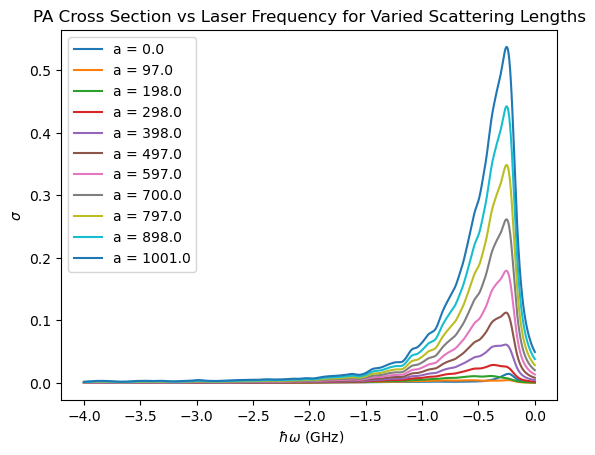

In [152]:
for i in range(len(Sigma_range_a)):
    if i % 2 == 0:
        plt.plot(Omega_1, Sigma_range_a[i], label = f'a = {round(scattering_lengths[rising_a_indexes[i]],0)}')

plt.xlabel(' $ \\hbar \\omega $ (GHz)')
plt.ylabel('$\\sigma$')
plt.legend()
plt.title('PA Cross Section vs Laser Frequency for Varied Scattering Lengths')
             